In [2]:
import os
import music21 as m21

In [19]:
KERN_DATASET_PATH = "./deutschl/test"
ACCEPTABLE_DURATIONS = [
    0.25,
    0.5,
    0.75,
    1,
    1.5,
    2,
    3,
    4
]

In [6]:
def load_songs_in_kern(dataset_path):
    
    songs = []
    for path, subdirs, files in os.walk(dataset_path):
        
        for file in files:
            if file[-3:] == 'krn' :
                song = m21.converter.parse(os.path.join(path, file))
                songs.append(song)
                
    return songs

In [18]:
def has_acceptable_duration(song, acceptable_durations):
    for note in song.flat.notesAndRests:
        if note.duration.quarterLength not in acceptable_durations:
            return False
    return True

In [27]:
def transpose(song):
    
    # Get Key from Song
    parts = song.getElementsByClass(m21.stream.Part)
    measure_part0 = parts[0].getElementsByClass(m21.stream.Measure)
    key = measure_part0[0][4]
    
    # If Key doesn't exist in song, estimate it.
    if not isinstance(key, m21.key.Key):
        key = song.analyze("key")
    
    print(f"The key is {key}")
    # Get the amount you need to transpose the song by i.e. from Bmaj -> Cmaj (say)
    if key.mode == "major":
        interval = m21.interval.Interval(key.tonic, m21.pitch.Pitch("C"))
    elif key.mode == "minor":
        interval = m21.interval.Interval(key.tonic, m21.pitch.Pitch("A"))
    
    # Transpose the song
    transposed_song = song.transpose(interval)
    
    return transposed_song

In [20]:
def preprocess(dataset_path):
    pass
    
    # We need to load the dataset
    print("Loading songs...")
    songs = load_songs_in_kern(dataset_path)
    print(f"Loaded {len(songs)} songs.")
    
    for song in songs:
        # filter out so that we use the same song length for each file
        if not has_acceptable_duration(song, ACCEPTABLE_DURATIONS):
            continue
        # Transpose song to Cmaj/Amin key. Because these two scales are the same. Just different starting points. 
        song = transpose(song)
        # Encode the songs into time series representations
        # Save the songs to a text file for later steps.

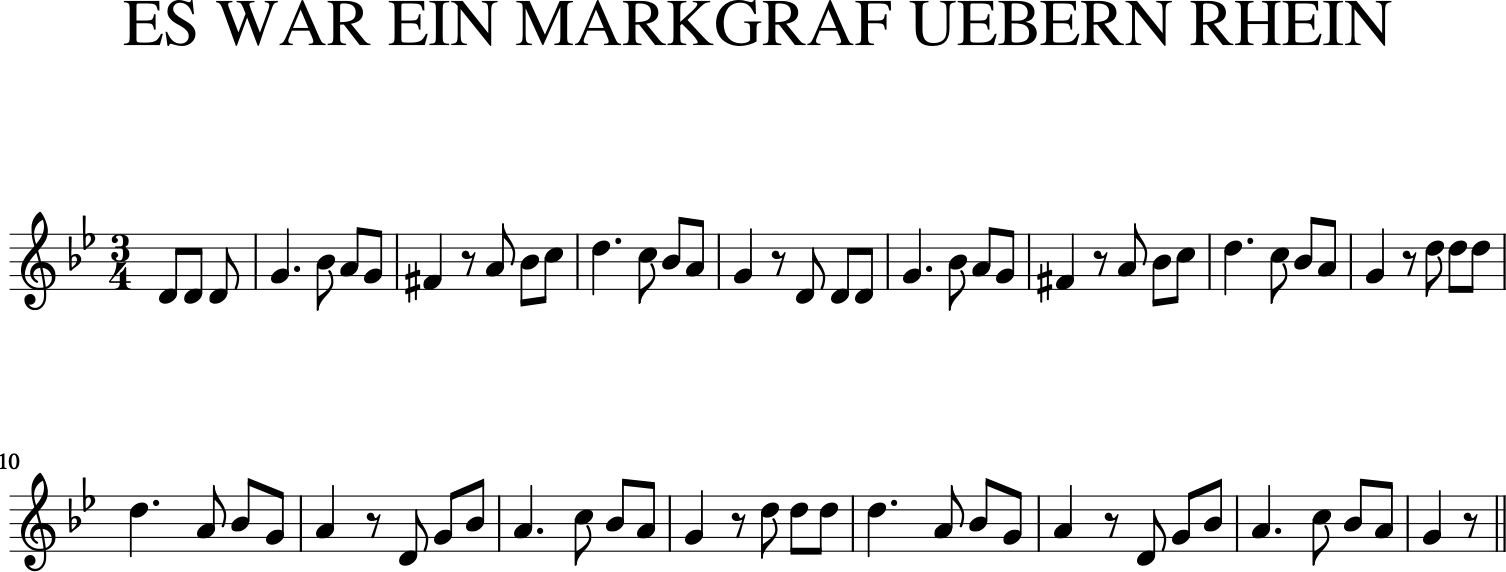

In [11]:
songs = load_songs_in_kern(KERN_DATASET_PATH)
song = songs[0]data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABeIAAAI8CAYAAACd7NvjAAAACXBIWXMAAB7CAAAewgFu0HU+AAAgAElEQVR4nOzdd7gsRZn48e+5F7jknATDFVCCARQRBRQWUXTNLLq4oKD+jBgwZzFn17CAigmVNaw5rAFEURRRUFBEFFCCICBJkHzD+f3xzuz0mdtV0zPT3TPn8P08Tz8c7sxU14Turq56660ZdEeyGFhv0pUouAlYNuJrtwOeADwCuAewBbASuBy4AjgDOAH4aWc//dYFrgE+ARw+Yh2qWB9YNMbrb+1sXWsAa49Vo/JyU1YH1hmy7Fng+qFrVN3zgZcCBxHfc1Pq+qwBlgO3ACtqKq8pqxHHxrT4J6t+ZmsT301dbiS+n/WIc2QVyyg/r4xiEXGeGNVtxG+rDusQx/wwbgdurmn/wxj1+PxH3RUp2AI4Bfgq8JoG9wOwYU3lzBK/n2Wdv5uyFrCkprJuIX73/eo6f3XPCXXbGngUsCewLbCUOPbXJT7/azrb1cDvgdM620Wkv5snAl8jrokfSDxn3HNM0UrieG/i82nDp4D7Aw+mvvNmmbqvU+NYQVxL61Bnu2jYa9e6xDE+iuXEcT1Km7ZJNxDHVFGdv53lxPHav4861HlOH9dK4rPstwEwU9M+biHaO01eJ5cQn2tV11NffYZpA/er875v2M8gZxnxvTXx+y+qqz1W5ZxY977qPKfXoew3Pc65v0z3vDvM+aHOe61x26qpNrCkKbYdcXKblm3/Ed7DUuCzxI1FlX3cBpwEvAzYiTjhzgBv6zz+9RHqMIyLKtYztb28r7yDxiwvVW7KI0co++qKZY9iMfCXzn6Ob3A/AIdQ/2/+1k79TwSOBg4G7tLw+xjGXkz+vFDcdi6p41E172OvTrmnDfGa64jzaR3uPGb9P1hTPSCOqWH3/zvqu9EdxgdHqOuNDdfp9Z393ARs1PC+llPvcbAcuAr4JfB54pq5G/Xd/HSvuXVsL0jsY5+ayn9QTe8Z4N7Au4njZNT6XAF8CXgesCO94+0RxMDSLPDaTB2WjrHv1HY78DfgZ8Bxnbrdm/ECD5q2lF7b8f81vK+PUv9nPup2Zo3vq6426CzwriH3/cMx9vXDThn71Vj/OrZtS97nJxrYzy1E2/xc4JvAe4FnEsfEqN7X0mdUZbswUcdLa97PCmKw9AzinPwaYA/qGzh5wZD1eX5N+4U4l4/6uVxRYz2G/Qyq/v4vAH4AfBj4d+BONdb51prqWaU9X/e+DqupvLq2soHS79S8jy075V4xxGv+DGxcUrdR7DNm/VNtYM0zk7h51uSsCTwc2IG4mXsi9Y2sjuKxxMm1qscTnfBlkV1/A/5KNJI2JxqXZR0IFxMX5B06//8rYPch6jCsRxCf+eOJyP1Bbgf+h2gQXQqcBVxWeHxTotG3tFPuYyrW4xLgG8DpwN+JaLu/VXjdRsSNy72J7+t+mef+FfgW0dD5dsV6DesxhbKXA3ej2vsYxebE97cL8ABg74b2A3AO0Qn638TnOCnrAw8jjo+dgAOYbKTEbqw662E74vu4O7AN8b1UObYgomN+BPyWOBdcTEQw30B8z9sQv/GnEr+tnN8TUZXjdu6uQfyu7w/sSgwMDIqUOAv4PvBH4OfEDUYdduzUYxvgnsSsoypRG48kjvu2rE+cH6vM8Lqc+KzOAc4mZko1YXVi4HWrzv+/kujsaMq/Er/ZnYnzVFPX8uuBLwOfI65Lo0aWLSWuXfckriePo/rsi78T15YLiJuhnxPfa7/1gft0/rsDMdC5a4XyzwF+XCj/J4wfQXx34M3EgG6urX01cTN4OXH934i42duO9CDI3zvPvXPh395ODASVWULv97IL8XtZs8qbGMEVwBeI38tZxE3jtHgX8KrO3+cQv5Wm6ndP4vqwAzGws09D+6niHOKYq8NmxHvp3kc8muqzLZYR5+LfEx3CPycCE6ramXgf9yfao4Ou+/8ATu1sJxLt/Q2BfTv1vxfRxmnqWKhiR+I6XnRP4ry1DXEeeBz1dQCVOYc4vx7FcO3pbYlz+g7AA4l7hUm5jLnnw659ifbizkT9Nm9o/zcR91ifI4K/Rp0xtCXRBt0GOJDB543lwL8Q1+Zx7U60P+9PzNoa1Aa+jhiM+APRtjq5hjpAzBx7OPGd7U6cR5tyJvGdfZHyNkVVjyDOJzsR91B3H+K1JwG/IT7HnzG4PV/3vrYg7qN2AO5L9FfUGX0+rI1YdebqfYjfw92Jc+J+9Nrag9xEDMSeQ9zzXUS095YRv607E+exg4nrW84PiGveuLPbNyDaZN37vj0ZPJj3EyLLw7mdv5vq+1CL7Ii/Y9sQeAcRyZSykrjQ/pG48cuZITpGNipsWxMXjDL/RkypruLZwMf6/m0FEVV8NHA+c2+o1iMaYM8iTpopl9JORPISIiJwUCT6M4BPD1Hug4nGT+4E/lPiM6gjGvQQYjCk/9zxMqIRP+g3Mq4fEI2QrncAr2t4n127Et/NfTLPuZ2YZXE20YG1JtGRuTG9G79c42EWOJaIbrx2/CqPbQvgQ0T0SMptRATtXxh889FNkVA8R9yVuPEssydxE50zQ9ywfIH8tNqziQ7vSwaUBzH48DHi957zP/QiBOuyMfAeIlqt33VEJMQXaX6qLcQ14rXAKwY87yTavQk/gnQajqLXdZ7XZAqKricRv4euvxI3022k8NgIeCuD06z9hugIu4r4za5LHI9LiXPT9uRvwM7q7GPQMVnF3YBjiJuRnFcTEWyjfIdLiBvNsg4aiPbHa4E/jVB2yobEd/EcygcabgT+t7Pv75Hu8F+H6MB9HHEuGJRO4wNEepoq7kyc1w8Y8LwfE+2Ha4lz67rEDeR2RCfAduTvI04izlf9HY2TsBbR3it2aD6C6KBtw17EYHuuc+t84ndRJd3EGsRvrXsd3Zg4hss6bM8nfY0d1wbEANCgtu3/EO3ES2va7yLg6cTMg/5z1u3EsfBxBrdJtyLOQ4/PPOdWIkjiIoZv42xMfOepGXQ7E7NlctYhjqNBMwg+TBxr3d/OEuJeaAPi3L4L+fud24h2z1sZbWbrA4lOzdxv7VLinvIaBv/GV2fub3wj4je+aclz/060V3PWIQbi3jDgeecSAxNXEveZ6xKf4107+9+R/D3X+cALqSc44WnEd5IbLLqSuD+5LPOcYS0iOiaPTez7aOJzvK7GfabsRaQUyw283UKkBDyXCKxZi/jeNiHuve5N/vexgjh+3kR5iqNhrEZ8dp8mf308i/h+z56yfW1LzMrZJ/OcG4hz4mUM7pReTJyDisfxdsTxVGYL4njOWUSc4wcFu5xI3KNVuZ/ejLiPfNiA572T/AzEUdyZONYeVfLYxUR7ss1gJ0ktKab6KNs+X8M+NgFeTJwIi2XnOveKuqOPxddeR/Xp4w8kRkLL3t9y2p1K/alEPbpbatAi58UDynz22LWeqxvl1t3eX3P5Kduz6nu7mnYjth9VUofiVmW9ge2Ji/glmXKuJn9j2Ka16KU/KNv+s4Z9bEl0mt7UV/YwsxA+nanjLPDQIes0A3xkQJmzDO6kHsUM5dPwH9nAvqrUpUpajfu3VJ9B16zu9gvaDTb4aUkdntTi/lcnOv9Tn8fpDM7/uj7wH0Rnfe6z/TjDryVQZhN6OXfLtp/XsI9fl5R7E3FTWvfvYzt6HWH92+3EDdwoeUE3Jjrac9/JR4Ysc3PyU9y/ULGMZxO/rVQ5txMdNpMO/Hk6q9btf1uuw7+X1KG47TRm+YuIWWRf6yv3wjHLHWSGdBt7lhhYaKqd9pqS/Q3b5l2fyKOeqv9ba6jnVsCRRIdhsewqM3a6TszUsepMrx2I2TNXZ8r6C6Pdi8DgNvKeI5bbNUNEjH++r9yqgSszxIzIVP3OZ/AMibWJQcz+46x/+wr1rEfwcGKQZFB7p4l8/c8s2ddnaP98/pSSehS3pwx4/Qzxm34T+XQkf6O+oJJBv4+yTtdp2dddiWCfVHl1rK23DZHeqr9/Z+shyjglU8eVDB9ouTrRLsh9lrNEIGnd1iCCQor7uY3Rz8WS5oljSZ9sjqxxPzszt6PtqRVesz4x2t9fr32H3PfaRCR32XvcMvO6um1KvgE8SkfbIlY9eRe3z41d67l+VCj7RtpLb/Rhyt/fs1raP8RnfV2iHrP0Uh5VsTZxQ5Qq63aiAT4NvkW6ns+pcT97M7dRNsz7PzhTx5sY7cZhMRG9lWuQrRiynlU9rm8/v29gH1UN6gScpZ5B2yqeUKEudd0oVLVzog51RI4P4/2JeswSecqHsT/5jv3jqOdm/NTMPt4xZtl3Y9WbyWtoJh3d3vSiPPu3n1FPRPIBrDpY2d0+M0J5ubyrw+RQX0QMbNyQKa/uCLJhzBCzQca9Zo9r/UQdultdeab7B5HrjJRNya3d0uSAx4bMbTPczGgdkieQrv/BtdQ09K+7NEzajVdl6njskPXYhHxgUDdd37BWJ7+G1yYjlFlmhoiG7ZY7TCqxV2fqd9yQ9diT9ODrLHGOrWPQ+oDMPrpb/6zxOqzGqoE4daW5Gsbq5NfFGeY+fn3yawzdRD3rxDw5s49/UG8QYBP7ygXgDIoaH8ahfWUPk2rnjZk6DppplLI2+Q7+WaLvo4kO8v7Aym80sA9JU+ZI0iebV9e8r+5idrNEGpZB3lpSp1FPTIsp74xvK5Kz6+Uldehuo0aXPytT5g3UmwPzgkLZR9dYbs56pG/yz6Hd6Iw/JOoxSzoFQk7uu7uR8gVL25ZbeO6wmvdVvKEflLai6GGJ+s0yXg71Kh2/1zBc47GK/k6btmaelMl1AHS37poNTTu5Ql1mie+tLR/P1KPJNUj65a4tqfzhOUuJaNpUmW8Zu8YRNZgq/0VjlDtDrCdSLO8ymrl5+g/Skf3fpN7r7yOJ3Kb9+/nyCGXlgjAOGqG83emlVSnbDh2hzDrskanTMS3X5cZMXeq0LpHzeJbB0/zr8AbS7+uTDe+7OMgyaq7s40jX/8Dxq5jc1zAz9Q5N1G+WaKMNa4Y4h6fK/D2jnbtyEcejzAhKWZPe9enWIV73tEz9jhqhHpuT77QcdpAkJXfu6G5NBCYVI4QnmZe67t9Vrr10DRGxPY6HZsqvMx1eU/vKzYzca8z6Fs0Qafq6ZQ8TtJC7f/7+GHU6IlNudzuP+gMR79e3jzoXY9YUajMlh6bXOAuUDKvYIB8U/TNDTCfuVzWvfL8VROf/L/r+veqCH3X5NDHdqMyBjHZcfo6YOVBmPebmVR/HOszN61ZXA3OQp5JemHEn2s1PXfdN7cdJrwuwDvV0do0r9dtqwscLfw8TIZj7Xq4YsS5VbUycl+qcfn8Dc9d1OK/GsodV5Te/GHhJw/W4H710RcuIHNYpTX/nXRuTj5h8cUv1gMj9XqeLiE6LlFcBdxpzH7lzyzjn2tcwdzHzC4noxXPGKLPMHkTHWlnU41eJKczDdBIN8n3KU2+sNUJZdV/Lfkn+HPAumkmfMMgLMo8dSrMLYfZr61p6I7GWCNQXaZ+TO/c0PRBQ7Bwc9bw/39s4o5glIkq/lXj8Xox2TW/rs7yV3ozfYaLO6/4c/06knUqtH/Asxk87VdVR1BPNXVQ8vsYJahlX3e2b9xFrepXZmPHXH8v9zpr4Dda9r7aO41kiJ33XMOfE3Pm+6XuAexDnnzr7UvsHuiZ5vKkFdsQL2llspety4IzO34MaTjtTnivsz2PsfznRuV+8MW67I/4a5i7qV3RX4F9GKPNW8jlinzxCmWX2pfe9/Y7Itdi0GfI30tB8B2DR9Q2U+RqiY7HM42h3+nyZ/hXsm/Q7IiUGDHdzlatjE99Zv12Igak6Z2dcU/i7zQHTfsXP9prksyKdxUYN1qPYqf1F8tFZbXznEIO7uU7QJzHaTJlRjLvIWJlTiKjuMmsQi9KNo4nj9kVE2q+uPxMDOBeNWF7KVkRne9l56mIiv24Ti/V+mlVTzo0yCNjEMXIc6TRaW1Jvmo8q7kR+rYa1GS4Nz7javJZ+p/PfOlJjDJL7LTVxXioqXpNG/Xzb/F5Oo1fnuto443gJ6cXfD2P4Nk2bn+W3O/9dRPU+jSbOe+eSn/kxaDHjuqxBXJPqTLlaPL7aCnAo08R5JPe9HMJ4gQZtnhOb2Febx/GJ9O6B59N932OIwcy69K91McnjTS2wI15Q/5TYQboNp0En2/sl/n21Mff/J+YuMNl2RzzkO82rpOwp80nSjenHM1rEXL9iqpC6c8+n7Avs2Pk7dWF9FO11VjdxvFxJdHilPLeBfQ6jzXPELKN1IOTqWFf9f06+UXsw9UZAF2+Abqqx3GEVP7/vk178bx3geQ3VYUvmLsg1aJHgNn6zi+lNHV1O5Cfutxrt5atv6j3n0p48l/HaknUft08HPlT4/wuAfegN7tVlCfkOj0Np9kbwcOYOzo3SEd/E72Ul+VmLbU+1fja9NmPq+3gh7XRWQ7vX0lOI61Ub762N629KsfNi1M6jNr+XFcB3O3/X1cYZx19Ir2dyT4bPFd/mZ/lrep1VVT/LSVwnDyHSDdZhGXBS5vGtOnWpaybMNLZD6/IXIrVVmTWIwfRRtXlObGJfbR7HNxBpJ2H67vtOJM7ZKUcSAXN1WMbce8xJHm9qgR3xmoTPERHAgxay2yLx73UsFPMh4JbO38Os0F2X04gFfsr8G6NFlV5KrwOz37pEZ/w4VqOXd3kl7S3OWIy4PIx0R+g4+YSnwcmZx+qeajrtPkKcI86edEX6XEDkg8418N5HdPzVoXgDVGd6i3EsJ98J/iLqzYnd9Vx6N5Y/As5qYB/D+ld6awN8lfTg5HOoN21R236UeWwj6lmItA5PYu4U5/OIY/HSBvb1StLn5a8CP2lgn0X/BN5W+P86BtrrcnLmsV1or65r0BvEvpU4d5e5M7EY4kJzOzEwWmfE3jQqzuptaybUuD5ItHHqzhU9qhMyj03L+b3MSmJQ8jWkA5HackqmDqtT33pkK4lUOBdlnrMX9a0rNI3t0DqdnHnsjnbvNUlvJY7jSa5DUOanDJ51/zlg+5r2t9CPNxXYEa9JuJDIFXragOdtkPj3Qxg//cPfiSnUMJmI+Fng+MRjSxhtoTTI52wfZ2QfIg97N/rvRNq5WC4FHtv5+09EioRUPvW2c73WLfd53q21WkyHs4lzxLR1xEMsXPWGzOOLidRTd808p6rbC3/nIjLa9mlWnULZtQVxjq7TmsyNtB8UDd+WYsqso0kvXr0Rsc7FfPV38p0cS1uqR85BxOBwt137JyLN22UN7GtD4GWZx9+eeaxOnyRS4MB0DfTkrmWLaa/NdQC9NsvniQXhfp147hGt1Kh9nyeupQtZ8TqZSvE3bX5DfC/T0hGfG6wcdx2Qpn2N+Cwn/d3fTj5139Ia93UNERhVNguv6wVE8NK4prUdWpfc9WppW5UQpxDHcROBE+M6il6fUZn1gW9Qz6yXhX68qcCOeE2z1BTTB1HP9OYvdP47iY54yEeUj9pp/n3SU/D3Y7xGRXHRvs+OUc4wimkPjiEGMI5JPLftXK91y63VkFqoVpPxDiLqNWWzzuNNRIZPg5tIdzpD5N2ss31xELB55+8/Eh1qk7Y9vUWwzwZ+1vlvKhL6COZvm2sF+UjT1KB5W15EXM+7KUj+SHTCNzVYfATp9/wD4MyG9tvvNiKKDKarI37QukNtXc/6B8pmiRvqMg/C6EfdcaUG1sH25zByqZHqvk7+lkjFlvNR4AE173ehyV2vJt220XSYJYKBTs88Zweis36+tvM1Af5YNM0uzjz2XsafBnQqkVtwUh3xFxKdN2V2JRarHdYKegMMZQY12lI2AJ7Y+ftGYuS3aWsBz+r8fRPwmc7f5xGdHWXazPVat1w0/z9bq4WqmCUijVKLEkLc/HyEehdvnSZHEx2BZbYnFjGqwwxzo1U/wOSnoMPcvO/dTj5Id/TtQK/jfr5ZTP6GtOnFGFNmiOjzYk74PxDpaJpa3Hgj8tOU2xqkLu7vAqYrNc2gmWltXM/uB+zZ+fs0enmAv0Q6anWhRsVLg+TO739vrRbzX+7c18R18n/Iz3hZQswY2KyBfS8UbX9nmp9uJWbZXZl5zhOBV7dTHS0EdsSrDWsBvwJeO+Trfj6gzBOA+4xaKaLT+qHMXYC0ban0NDB6p3ku+uHpRKfKsA6kF937FfLTIetyEL0G0vHMjchMdXbN51yvqTURYOHfCG0NnEEsrDdf3EhMDc5FQB1Gc4uXTtqV9AbHyryipv3sTW9Q8mraWyQ6Zz16U75vAP678Ng3SadDma8dfZuSby9ekXmsKasRqdiK7YpziEj43I3SuA4mPf34FuBbDe67zDLi+Nim5f3m5K5l0M71rD8avusW5q4jUHQgcJfGatS8TYnr6AsHPVGt2474bqY1RVku/eEFrdWimoOJz7KunMx1WR3YJPN4U9fJ1xOzoVPuQnTYr5Z5zh1Z7no1ibbNHcXuxHE8yT6YYV1KtBOWZ57zNuBR7VRH850d8WrD7sBuDJ8z+a/k88jflYhqf/SI9QI4n3TO0DZ8mXRew0OIaIZhLAX2zTx+FyJFzbDaTkszw9ybyf40GN8jZhSUma+dXbmFnFIzJxaKvYlZIJOanTKqPxMDRrkI7Q8RC2ctRO8nvXDtXtST6qF4PB9Db5HtSXoaven6xxGDMl3LiOngZfYHdmquWo3ZNfPYP8nPDGnCWsS1s5iK7GyiE77pTt7crIYTmftbaMvN5AcE25a7lv2O5iPiN6G3MOtVxG+l6KOUn7MXM7cDf755CHGsbj3pimgV+xDfzaBBqkl5ZOLfryUWK5wmjyc+y2maBQSxEHXKSuCXDe13BXG++3PmOfsA72lo//Nd7np1amu1uON5OHEcz7e13X5GfrB7hkg9vF071dF8Zke82vDQMV47aNX3dYFvE1Fx83G0/1pi8ccym9BbqLSqQys8Z9j883en9x3+lXQO5Do9mJhaDrGAS/+inStI54qfj7le1yUfFdB2lGXb9p50BcbwA+A1mcdXI2aRLMTOkfOICPCUcaPitwUe1/n7NtLHfJtmmNtZV1anj5MeYH1x7TVq3r9nHvsB7S6St2Fnn08o/NvviAHoqxre9+pEZ3/KKQ3vf754UuaxNq5lz6Q3g+8TrJpC6yKi3Vjm2cA6zVSrceO0tdWsaf5uHgjskXjsGCa/CGrRDNPbXsyd904ln4d/XNcRAxQ3ZZ7zEnoDlAqbE4MUKd9pqR53RNN8ThzkY0Q7P2VD4OvEvb2UZEe8mraIaByM6qvkp9xBL0/sGUT0/XyTS0/zjCHKWUQvXQKko86eQExhrqo4lfZ42snPXOzoSqWh+RSRs63MfOvsOpz0wp5nEJGWC9US5tfUxDLvJXIPp2xBdMYPO8NlPnhv5rEnAvcYo+wX0suxfzzNphyp6mFEvneI4/JPJc+5kpgKXuZp5KevT5ttiam4ZWaJhYvbcidiIPghhX87i+iEv7qF/T+I/I2V0XPx3Tw48diNwH81vP/FwPM7f68kPTsl1a7YkLkzAOeLGSLCUNNnHaZ3fZB1ibVsylxAu+f3Kh5Mb+H2abI5c++/+r0181hdzmHwuesT5CP372heSrov7CQira7qtxm9NVzmo1ni/uQXmefcG/gkC3edMNXAjng17Snkp30N0l0UsUqOwp2Jk+LRzK+Vzv+XufnPi/Yn8p5XsTeRmgZiYbKPJZ63OpH2pooZ5jbs2sjPfCd6kSWXE6PKZa5lbm7moicxf3K97kq6kb6MGFSYhsUpm/JCqv/Gp9UsEYX528xzHgR8uJ3qtOpU0h2QM8SNzijWZ+5A5AdGLKduuZRZRamOvjWB59RXnUatQQyArJ14/GjgzJbqcg/id3bfwr+dSQyMpBbfrFsuGh7aT9EzbTYi30Z4Pc2nDnoMvXzX3wIuSTzvJMoH0SDSYc23+6PHAveadCVU6uVMZ0qaLYj7j7J7tJXEdWoaUsF1zQDvm3QlSiwmOtxSC6J+hVjTrA1fI9/pvxZxTzWfggGasi/wysRjNxNt11TqRY3nLaTblfPFbcC/Ef0UKU8mzv9SqfnW0NT8MUPkHKyj8+RKItIntQBe/36fD/yRmE4/H0Yib2XVHKZdi6iWbgbmdlp9Fvh05rnPpNpnswcREQkRmX1uxbqM49n00gwdS35abKojbDERZT7tDgZOJgZHyjyLhRtluZgYMHnjpCtSk5uICPDc9ONnE9/pQpOLij+M0SLYnkEvD/sPiGivSVtKL13YJeSnLf+S9PojhxOd3NNsGyIXZirN1wmMPsgyrF2JxduXFv7tN8R6J01O9++Xm93xD2Lh3juq3Yg2QmrRx2NpZyAytUhrv1nSg2X3JJ0ze9osIq47x024HlrVakTQy6smXZE+GxODTedSnh7ib8Tv/0dtVmqA9YD/JD3bZlLuRFwLH5N4/AzykfJNeBP5tslS4AtEG/yOaAZ4LvBdyu+DVxJBhL9rs1J3EGsQ7d9nT7oiNbkcOAC4PfOcd+FsNSXMx5zaatc+FZ83Q0RDbdHZdmT4xVlzLiKmdv6QaPgMsiXwRaLD+XBiUdZpdjxzF54regbwTvJR0RsQI7MQ+dO/QESe/YrI/9jv3sSN86Bpd20v0roG0UCCWJX82AHPP5PooCmb4vZsIjIklzNxEpYQF+7nMTfFQtH1REqgVB7bafJo4ngbZBERhbM5cY64T8XXzScXEhEQJ5Ae6D6KWPMgtxD1fPNt4hxb1lG5JnEOPnKI8hYDLyr8/6C1QtryfHo3bh8lzrUp3Y6+sgHRrYh0L5+vtXbjmyFmlj2P6EBKRSx9hMg320bu4P0oz7W5Pu0PZizNPHZpW5WYIouIjrznE9e0so6dlcAbiJvRpqMLd6S3GP2fiKj3nM8SbauydENHEB01bXp1hecsItramxHX0l2o1ibW6J5ItYX3FhOd3N37oPvSXhqVVAqxGSIKekPinuwBxOBqWZq8S4jBq6OIiOAmvIxV12woswa9tuIWxP1KKn3jJGxPXCefTo8SpZwAACAASURBVFyLynyJCLxo+x5kJXH9/iVRzzIPJ1K6VjnnLBRrEe3zw4nfU5mrgIOYrkGoaXQIsFeF5y0mrlVbEMfz/Ylz0UJyGvGbSuWMX0T0Rz2AuEeU/o8d8Rpk/842Df5AdBIcR/Wc0g8nOr3eCbybdE7xSTuFWAi1LJ3KNkSHbW6R1CcTjQyI6NHu9O9PU94RDzFIkeuIX5PeIn3LiQtJ0w6g1zn7dSIyZ5CjKO+I34jozE7liG3aDNHgWNrZ7kOkD3owve+q30piav8bSU+pnzYHks4hfUd0EjEV8T8Tj69BrH2xK3BFW5Vq2Aqiszx1rB1OnH+r3tw/llgkGuL8/cOxalePtekNlt5O5Fod5EvEVPqyaeAvIQZMJzX1eQnRMbOU6GTakzg/5dJE/Y5YGD21wHjdDiQGg8tmDG1HXOv2JqLR25BKPUBDdTic8VOsHUM915K16V3LtifaJA8ln+LgJ0RHT1uDjsVZcMcw+Ni6AfgM5bPnHk4ELLSZbuidLe5L1c2HBS73ozcINYwriXQm3wW+R35wuQ5varj8uq1OnIOXEoMdexDnvW0yr7mAGHz8EpO7vl9PrAf2K3ozC/u9iphZllrPZr6aIQbElna2nYl2wu6k12laTqQXejP5VCN12ZdqKXerars/b76kV2zLJ4D70Vufpt/GxHl2T5ob5JQ0Tx1INBaa3urqEJ0hopVuGXL/5xH5ZKfVO0nX/TMDXntq4bn/Xvj3jYjBh7IybyAWkUp5UuG53xzurYzsZ4V97l3xNWsQDaey93gu9afg+kZiX7NESqQLiaiK1Odetv2ViBhMRa9M2hG0c4540xh1vHOm3Nw03UGeUCjnuIqvmSEGVHLv9RQGR/R+p/D8VIqQNlT5DNYiBgBT73eYVFEnF153WOZ5x2f2t0PmdaN4ZqHsYdbK6EYCl211L1ZV/J76t8uJa+DlxELeVY/J24gct4+jmXSGbxuiLmXbz8lfx+r010w9ftDA/j5MfGfLMvtNbbcSqZFy15SXZ15/MdFRcAUR0Vl1v9cTC6nvTbupAden97u+kerrBO1I+r2kItzGcUZmf3Vt72qg3oMclKlP01G3r65hX8UymtzGyRf8oIbqdC6xiPIDxqhb0ckN1bN/G3XR0dzneDUxm+Yy4h5pZcW6LCfaaweRTjU5rhs7+xomoOyx5Ot9IzHgmHNI4fmpdF5tKN4f9m/nEPdeVxNtlqq/ob8Q+cpzAyuj2nKIejS5jXr/88GW6ld1zboye2XK/eAY5RbveV9f8TVrAD/N1GeWuGcZ1C76Y+H5C23WuPoYEa9BPkVE7Q0yQ9z4bNbZ7kVErZdN+R1X9wT7dSLK8t/zT/8/9yAiK48kbv6nbQHM40nfRDyJWCSwLAftDvTyJt5ALFDWdR3xOR1U8rr1iEGYVCf/oYW/21ik9X70OqZ+T1zQqridWJj2yJLHdiBmdHxv7NpVM0xH+teI93gKcBbT93us6n1U64RaRMwQ6J4jdiG+m2mablyXWSI10k6kF6vei4gif2Hi8fnmFuJm/i2Jx1/K4HQuEOeBvTt/X0m160/TZpibe3qYm9GPAq+gvBP7CKIjuQ1bUr1Rfw6RbuinRP2mOff5HsQMk8eRz9NZh1Q0HURHTN266ZlWI46LlzJ47ZvziNkWJ4xZp2FSC54KfJ+4lp3GZGYeHkqvvfk5YkCginOJWUxlQRpPJWaAXDV27aqpkke2ex3tTvXfpfO63G9T43kr1dqjxbRBmxHH7P60k0LrJGKQfDWiI7j7382JSO7utnHJa3fobC8gBoqOAv6bZs5pj6PaArCrA5vSS2uxD+nZvXXahOoLmV5ABCmdQnQSt7Vo+DC+TcywTbXL1iGCi3Yj7hfnq50qPm8F0V7o3nudTbTXNZyXEp/dIN10Xd1UarsR19qFuD7B7URfzRmkZ5YeDJwOfKitSmm62RGvQc5n9LQAWxA3g/etrzpzXEx0MB9FdMzvWvF1byZuXv6D6UpVcw7RIVsW5bEWcQNeFqF1WOHvL7NqI/fTlHfEQ0R5lnXEb0FvsbJ/MF5EcVX9i6wN0zg6Fngd5ee0I2ivI/7bRETGLUQU4/NJR8f8moVxMT6H0c8RS4n0BXWuJzEtbiFyy55BOqXFC4jfwXEt1alpxxCDiWW5xbchUk+lFqbuenHh76Oolk+2aXvSOy//msFraxRdRJwXHl/y2AHE4pYXj1O5is4hpqHfTPw29yV9bZ4l8sfe2EK9cm4l0gFtRAzypOxPDGQ/hWZTK+Q6kKpGYI9iOXHz9hRicdrU9GeIWRF1LKp+GtGpf3NnexLpNDnXAe+g+bQWKYuovkhrmaMo74hfQgyovn3Eeg1r1Ovo3Yl0UTvWWBf1/I7Rv5ttiQ6/pvP4X0CcAwfZlPitP4q5KS27HkC0R15DXIvrnunzY0a/rjyRCGBp0p+BX9C7Tj6Q9AKxqxGzT65uuE7jejsREPKExOPbEgMvj2Vy5/BxfZUIGLiZaL88n/Lgh8XEPccx7VWt1AlUDyKsYgsikrotpxODT6O4b+e1qZRJ89mVxHnqZ6QHx98P/JaYOSRJ2dQ0404p3aNQVpO5uhcRHdKpFCVl2/eYvmjcl5Gub1me1dWIPOrd5+xd8pzF5KfUl0VxF6dltZFjfRN6qYauZ7SZFF8k/R7vVU81gXxqmv5R8OdlnruSaPjOB7nUNIeNWfYTC2W9aYxypik1TdHeREdaqm63kp4SPp9S03T9F+n3+ivy0bxb0ptWfDPRaZDTVmqa4rnl6SO8fj/S9XxfTXWEfGqa/um1dyU6EFLP/xrNpKLpl0tNc3DheYdnntfdjqXZdCh/yOz7nAb3W5RLq/CLIcvKpabpH7zfjfyU/0nmN394oR65tXRSViMGw8re19+oN6I5l5pmHLsUyjE1zXhl9G/jroFzcKGsplLTjNJO37Lzutw59Q0jlHtyprxxZ0l/plBWE6lp+me7bUwMpqee/2OaS0XTb5TUNF3rEdeo3Hf91sRr50Nqmv7f1Wsyz11GzLBoWi41Td3BbU3sK5eapspCrTnFvo6Fkpqm6GmZes0SaTxTgQ2mprkDaeMmS3ds3SnLTVtJdBDdk1gksUqaj0cSU5jbzGM6SG7xvt1ZtUP5EfQibS4hIm/6rSCfY/4ZJf92aOHvNtLSPJPeoMhnGC1iJtdAfFHmsSZ9lHSU0gwRhVJ1SuVC9Q1iJshC9ROiUZeyhOj0zC0EOZ/kzr+7EQudpTyXXqfXZ5iOSLOtgH/r/H0toy1afRKRd7bM/2MykUGXELPCUtebJzLaDUidilP9jyYGNnOeRbOdkLnFlctSPjQhN3virw3u93Ty19FXExH7k1BM7zVsNDzEQOlHEo/diYgcnnZnUd7+0+R9nphdPG2uIK65ueP6LQy3vkvT3tjy/q4lrv+ptGf7EG2eafdPYqA+l7Lr9aSj5uebdxMzEcusRqx7s7S12qjfh5nfqZAG+Sz5Ge+bEfd90xYMqpbZEa82/LjFff2TGGndk2rTsw8kph5Pi78RnTYp/dGYxf//HOkOsFxH/KHMjei4L71Ik4uIwZQmLWbuVPvPEzlQh93OIf2dP43qeR/rNEvc6KSiJdcjckxu1FqNpk83qmghO5pIEZVyF+B/WBjp4i4kbnJSXpH49zWZ29E6TjRLnZ5L73v5EjFwMuy5aQPS5+ANmDvw2aYTKF9bo+vNTNeN+UeB5wx4ziuBVzW0/4syj21MO23q3ODU3xve97HkB+Y/SXpNjKbcHXhM5++riWvJKO2Hr5DOif0SpitgI+XkSVdApWaZ7u/mv8hH1P8nsF1LdRnkYqKN0aZfk1/L5wXEgPq0O58YLM3NvvksCyPF1UqiXZX6rWxC3Hu1tdC75lrG6Klt5otXkL+3fQARADAf2hZqiB3xasMkonROIxZKynVAd72fwSkQ2pTL8/g0ep3mmxALH3XlbpDPJ33R24JYWLfrqYW//4fxp0wP8mgiT3LXL4iR8mG3a0k3INdkcAdOU24iImr+mXh8OyLKdiF0wo5qoUfyzRKDTbnc4vsA72mlNs3LpVt5NOWzQA4iFnOCiGRKRZC3aQlzzxvPY7RzUzeHdsqLmVx77O3k19D4HHDvlupSxbFE5HvOu2jmfH9e5rE1GG6x7lEtIx3V2PSaN92B5dQibWsRM5y2aLgeRc+jdyO7KTEYMcrxeT7pa/D9GX8qfhvaWvh52hQ7MpZNrBZ5097GeQXpGT9rAO9tsS6DTOKz/Dj5+8ljiACwafc9YgHqlPWArwPrt1OdRl1H3Hul1hm6LzGT3o7QyZj2c+K4lhHrAORmMR7G4JmeWsDsiFcbfk0s0Hdmy/u9jUi7Mmja4DpExNO0+DrpReE2IzqyINIKdNM4nM7gjqtcRO4zO/9djbn52gYtrFiHXKRJnQ6n3lyvw/gT+dzSj2AyeV2nxSnEYkt/mHRFGnQrsTjnlZnnvIQ4rue708nnau7PkzvD3PQ90zLV+0B6gwNN2o7eeb1tK4lzfupmYV0icqyt1CtVfIK4ZuUGiT9CvYuhweAc7KlF/eqWitxuw81E58YNicfvQkSXt3GtXZv2IlFz6cWmxS+I6+jvJ7Dv3CBQ0/eaxd9aKuBh0n5MfDe5wbxJupFIlZjyOCJN2zT4EvFZ5tKs1K0bTPG7xOOrE3VK5X2eJu8mf2+3PREZvxD6iM4kv7j5gcDrWqqL5voeccxcMumKNOgqIs1jqk8HIoXNfBjoVwPuyBGYas/tTC7H5kqi0+dm8vlun9Z5vOno7ypuIDo++hdL63oGEXVW7Nj9bIVyv0xMQV275LF/JXKh7kxvcZCLiEGUJu1ILGQIEb3woxrK3I1YiLDfVkSj6/M17GMUXyVmX7ws8fjLiJXU28jJP22uZvwF0eaDy4hOrNwCX58gBiTme97891K+eDREx+/riVRcdJ63c+fv3zDagotNeEHh7xMYv5NnM9I58o8gndO0ad08uKdS3oG6DdH58Sgm2wlc9Cni+v4pyiPaZojZZTeQj/gfxunEAP+SxOMP7tRnoTufiOT6WuLxvYgcsM9tuB5PoZfW7XzSnWTD+Fcisr/fE4g0OG2nxRjGDUzuOvqPzGNlbc46FfPsTmtH/KVMfxvni6Tbp4uI+7hpSBn33c7Wtu4g5K8pjxjfggikegj5jrdJmyXuI3cA7pN4zuOJDurUAq7zyaeAPegFnPV7KzHL65ut1UgQA8bTfk6sw5lEwEBqoLO7ZsGuxD2ipDuYA0mv7PzqCdRnSyJ3Vp0RVYuIRWNzq1jft8b9jevRpOu5HNi/8P/LqJ5a5zOZcl9NdFJ3/7+NNBlHFfb39prKfDLp93g6409D/Eam/DsPeO3qRPR36vW3Ag8cs35NKK4g378dNrlqzXFn0nX8zhjlPqFQznHjVfH/PId0XWeJzp5NiHp3/+1BNe17FKN8BouItRFS77E4A6R4TB08RL2Oz5S/wxDllHlAoaxLiLUsxrU2sQBpqs47p19aSfF76t+qLLz6rMzrZ4EPjFm/Mm/L7O+RFV7fjYxPbTdTb7TR1zP7+hPtTHO/OrH/XEqoMi9PlDNLOhCg6L2Z18/S7JTrGWKwcpjfShXHkH4/dczUOSNT/ny2M+n3lVu0rg4fKuzrMQOem/Jq0vWfls6iB5GuYy7He1XrZcqfJdaAqOLkTBnr1lDPceU+x6MqvD53nZ0lOtyauA7c2Cm/rhRk2xCD8Kn3sZK4Fz2E4T6fpvyM0X9XaxEdoqnX/xO4V8313TKzv3HuSdra1wczZU5LBPdepOs4zqBh8Z63Stu5ikHtpV8QQR5/LPzblqUlacFYCNOOtPDsT3SYDtMhM8hK4sSaWswUxu+4qdMJpBdlW8zcPPLfzTy336czjz2HmELV1XRamvWZu0hh1Ub+IF8nPar8ANpLH1CmmzMulZ5kCVH/O7VWI03Cx4hc1ylLgS9QT+fvpKwk3zH4XOLGf1t6a11cRqxLMQ2K0fCfAlbUUObNRK7ZlBfXsI9xfIL8QMsRTM/AW9cnmftd9VuLuBHdJfOcYeRmVN2T+ZEnuC6vAX6aefzDpGfFjGtPegNXlwAn1lRurqPp/7Ewcic34brMYxs0vO+tC39f2PC+FrJ/kp9RsHXmsTuSb5APVPoPVk2/N43+QtyPpO6LZ4hBhXu0VqPm3ELMZkjN3JnGFHxaWF5Dvp3yIJoftNaUsSNek7aY6BwtLgZ3Qee/L6PeqII/kj8JtpELuKplxDTRlGIE/DCpTH5K+kZlKb0pvhcRkVtNeia9KIYfEo3COiwj8gOnTHo9gL8Rjd9Ux95WxJT/VPqDO5o1iXNEGwshtulFRCqQlId3tvns88Dlicc2ICKwX0jvPP9hpmOxvS2JtBcQUSl1phv5COkb34OZ7HVollhL47eZ53wM2L2d6lR2NLHYYMoGxOD2PWvY19eJNCgpL6phH/PFciJyPrXIY3fK9d0a2HfxOv5J6hkog0gL9sPEY+sxfQNR0+Jy0pG62zW8724qwhXkj81ptQ7RxpmGDs/UwpYwP9qk3RnVTS8Y/TryKfTeTX2zdJp0IvDKzOMbsHByqP+FSEObsi1x323a5snbgDiOl064HnXqtpdyfR3PofnrpaaIHfGatP8got/fVPi3bkf8vYictHU6IfNYXdP96nL84KdwPcNNO1tJtdQSX6bZqdKrMTf68xM1l38s6RuKA2imY2AYPyFGx1MeRHTYtZHmYNq9iDhHtLWob1tuI6a8/y3znPkcEQ/xHnMRHi8lcpUC3EQ+WrxNxYWdf0C9i0ldTETUlVmDZtN5VHEz8btMLYS3BtEZPS0L93W9D3hz5vHNiE6HcRfTW04+b+4BDE5RtpBcTn5geVMi0nCdGve5Lb3Ze911Aur04cxjL2b+n5ebsIz0mkL3prm2zGJ6s1n/TKxJNd+8kmjjPGfC9ViDfJrL3ELz02CGCGI5nXTu87p0O9VSgQYzRKfufAgg+U/yM70W0vnu28A7Mo8/nHbSsirvPcRx/IRJV6Rm1xLv6ebMcxbS8aYB7IjXJK0OHNn5uxip/nciFx5EHuE6T0p/zTyWiuqalF/RG5RI+RLDDyB8psJzmk5LU+wMv4Z0x9SoriI9o2AR+VQGbXkf+ff9dBZe5/OwNgBe1fm7rtQDw1o98XcdLiemy05758E4n8HH6J3P+21NRJlCRLXm0hu0ZW3mdoY3MTjwX5nHns/kIw8vYG7asH53Ijo81sw8ZxLeTH4m2V2JwfjNxtzPF4DzEo8t5o53I/9T8usJ7UykxaurM/bFhbK+RyyEWafvkp45uA2j5yFf6E5L/PsGNBfldy9615CTG9pHkzahN7tjUm2crkGDq2e3UovR/SuRevJWIp94064gPwi5ATEIWUdqphl6wQGrU+/A1iwxO/GsGsucZm8EfpR5/CXk2z9q1jb0AnQmdU4srlFY933f2TizTh12xGuSnk9ENsHcqcCz9KaX3of0SuejyOWIn7YprbMMjoofJi1N18XkGyEX0Wxamhki7VDXZ8lPhx1VrrPrWUx+0ahZ4mKcG2z5T+BhrdRmOr2OyNm4ksndZG+U+LsupzH5KOhBxvkM/sHgzuw2FvSr6lCicwRiULjuRbUgZsSkOjU2p9pCmU37JnMX1O23O7FA4DTN2pklbuBy168diM7bcTpHlhOzOVKeQsz2uyN5PzE4k/Ik8rPAqtqI3k06NDNQtoJ8rvgjGtjnQpBbL+CAhvb56MLfX2poH006khhIuJ12Oo9z9h/w+HdbqcVolhDpYCA+x7ZmOJ9CPrXL9kSe9XEDytam1yG4iPrXqriZiNStut7YfLaCuEbnZqNOYwq+O4p3EbPmryBSxU1C0/d9Xwbe2UC5mmfsiBdM5kb6HvROQhexas6sYufkuxh/OnlXahHMPwB/qmkfdfrvzGMXAj8fsdzcoq1fodm0NHsCDyz8f91pabp+TbpDZgNGH5FeK/PYsMfS9URE9C2JxxcTi1duM2S5dZvEOWJ3egM2vyKdKqMrV8dx6l9shDW1kNOniDzX02rcz+CD5HM4f53R1oio81iEaBMVc08fRzOzFWaJG72UlzBa/XMR6qOU9wbgx5nHD2X8nOh1f4e3EB0KqZQBALsSnfHrZZ4zyP8Cb8s8/hEmnwJtkDo/++4gSC6g4W3AY4cst99z6KW5uZz4HppwHOljfx9GX/w395lP2wyTYX2X9KzTp1B/O2J14Nmdv68kn7N7kEm0cR5Kb9bjqUR6tpym65gbPDyD6hHTk/gsX0/MjoD0Gg9ddV9zPgB8NfP4o8lfK6rob3dtUvqs8VwMPJn61tuoW53tm78Tg8PLE48vYfwUfHX/ztre1ySO4wOJ7wXiOB7UF9HUfd/Gib/r9AaiHao7MDviBc2M9uWsS+Sj6144yk62xY74jYjI7zpS1OyT+PdcfrxJugD4ZeKxzzF6h/nXgBsSjzWdlqYYDf9Lmh3xzqXheRmjTTnLNYBHibL8HfDczOMbA99ivE6jcW3Y8v42I2aDdK9Rg26sIF/Hcc5xbXTEQ3S+5iIKJ2ncz+AS8ilD3j9CmZDPZzvKsfhY5i6Yd9wIZVT1RdIL0+7MaAv15r6bUT6P5UQHWq5T+/3AfiOU3VX3dwhwGYMHWh9MzHZYe8R9QKxt8/3EY+sTaXCWjlF+0+q+lg0aWJ4hggt2GqFsiM6RYrq2z5HuSBnXtUQ+4ZRXZR7LyX3m46ZMmrTlpGci7kz9+X7fT+/4ejfjdSC23cbZkrnt03HbOON6EjEwkHIk1e832v4s92PubJtBn2Xd573uIGQqXRlE6q6nZB4fpL8N20RHPMTAe2621yTV3b45lbn3o/3GTcFX9++s7X21fRxvRwQwdFU5J+bu7ab9vm8FMfg5bdkYJLXsjURDomx7bc37WpO4OS3u499LnveMkrocw3gjnHcmbhD7y72UyacpyXkB5d/NPXIvquDYkjIvotlR8D369lfHVPWcTYi0Jqnf92EjlHlhprxx0sh8LFPuLBGdManB049m6vWMzOtGsQGxSE9xH3tXeN3DM3VM5fut4lOFcm6g2e9gcyKisOw9PKjB/Q5Sx2ewM+Xv6zRGP+eckyhzFnj8kGWt1lfeoPU56vAN0vUfZVDm9ZnyRklj1rUnMWiQKvtaemnmhvW/mXLHjbY/JlN2dzuR8SKRN+iUkSr/MmKxyrosIiJny/b1viHL6g7ml21HjlHHp2bKnSVuPEe5SX55Xzl7jVHHKp5A+j2sZPiFGGfIH0e71lLrydqIiE4ve39/pr6UGk8vlHsBc3P6juI40t/Lk8csu9/GwG/79lElDUbxPfdvuRlWg+xMXNdTZR/PcNfoKzJl1Z1SZXdiDZpu+dcwOGjrOZn6jZOT+t6kz82zRPqX+49Y9iP6yhq2fTOMGWKQqOw95FJ2Ne0fiTqNc+6cIVJa5a5XxzFaG7X/Oytudbcvm9jX9zNl5gbtRrE1q95bV1n0vqlj+aeFcs4co5wqdgL+Sfl72LLhfUuaArkOwHEad/12YtXG5yzlUUAPSdTnvxgtMn4RMbJdVua/jVBemzYjIo2KdT61hnL7O8VngffWUG7KIiLFSHF/j2twf10XkP59n0d0wFW1mHxD+5Ax6rkmMf031yB86xjlj+ObmTq9ucb97E7crBfLv4lqi1cekqnjrYzegX5eX1mjpiSo6gFEffvfwyQ74uv6DPoHYWcZvZNjEbG4a+o7Hzbv/vP6Xl/3AtJlch3no9zsHJ0pq0p0Uc4RA+r6e0aLvDorU+Y7xqzzusRAe67es8T04HUSZVSxGtE2SZV/HTFgWcesvgMy+xm2I747G7Fs++iY9fxIpuxZ4lwwzIy0zYmI+2IZTUfs3Zn8e6iy8H3RZgPKqztifFL2Ix0A8QvG64xdh1g7Z0WhzHHTHQH8gPT3MurshzIPIVKAFMv/B9Xaoa/O1HGU69VqxGBnWXuju/2B4QKVVmfud9O/7TxCPcssIoKU+uteZUbvmzL1+/2Y9To4U/YsEWiRSpGac2RfOcOe64e1FqsGxMwyuY74tUvqUtzGWUB7PeDcAeXnIudTDs2UdyP1BvU0sa+y/pru9tTxq/x/HkOkCiqWf27F174pU8dzRqzPGsSgWbecFdQ/g6HfEyl/D3bESwvcYiI3b+pEdjHjnQi2JKY8fofyhvlvEq+7U6ZOP2K4vG2rk74pzC2yM02+w9x617G44wzwx75yH5h9xXiexqqf/8EN7q/rpJL9FrdXD1HWXgPK+vSYdV1KRJfm9tH2QnFrkY9E+R3jNVLuQnSip76nqguElc3wKG77jFC3sgHBj2RfUY+yY2VSHfF1fgb9sxYuYriBsKJBx+K3hihrQ+CqvtePE01T1aDI4d9SPVp7EasOmBS3mxgvvdUMsV5Frr4/Y7gO7a3Jz1iqY/HCdw6oc3c7nfFveg4jIjJT+ziT0c5DEIORbyMdUX0FgxdbLFqX/KDyeYzXUbCE8o6c4vZFqg9OlJ3ftx6jflUsIh/BvpLhBstyg8WzNLdeziTkZtqeS3SeDxNluiaRP7j/fuX5NdR1ffLHwhmMPlA3Q6wVcSiRw76s/Nwix0XfzdTxWqqtpbWIGEh/E4MHKU9i+BQojxxQ5ocYfQbc4k7dX8WqARvd7dnJV/f8LFO/lYyXFxzyA+KzRGd/LiVbvzVY9Xd/OeOlVaviLqw6u2VSHfGPIf+ZfmDM8ndi7syKsu3pQ5Z5/IDyHjJmnZvc113It82+z2ipXSGO/3sQ0eyp4LMPVyzrR5k6rgTuOkL9Di0pa5SBmGG9uWS/dsRLC9hGDI5amiVGKr9DjMC/AXgFkafzWcD/I06mLyY6NN9C3EycQL6Dv7u9J1G3GfIN438Si7gOOkntRUSPl52gXz/gtdPkIHp1v5368gMWI2wuorm0NE+hPC3QT8kvMjOujVi1g61/W0a1d6Ke5gAAIABJREFUHMdbsGpEf/+2HHgmo3cuAjyKfANologIa2Nhty2IzpJBx/FlRETWu4nj6uVEtFLxHHEE8Xt7GzFgcRLpNCzFrUq+yn2J4yJXzu+oNtWx68GU36iuJM5/dUS35nygb7+T6Iiv+zOYYW4E9EvyT0+6O/loneJvZ9BsirsSHaT9r70F2G3E+lUxQ1wrB72HYxmcdmEx+Y6v7vZVxutkWI9VB2/7t18DO1QoayMiEn1QnV/JeOe6XDqH/u1ComN13EW+jiYfFXou0Z76F/I3s4uJNsx7SKdEW9Ypa5go4yXMTTeV2j7IeIOsdyM/MDFL3NDnIkQXE++/7LXvpdlUeoMG+2aJYJW7VShre/Jp7WaJ9sNCiYqfAQ4nf13+NTHLb19iUGXtzusWE237XYhIwc+w6myI7rlhXFuTTxHW3S4hOszfRa+Nczi9Ns5ziTbOa4C3E+ksfkS1GTlVBhOK9wCp7TqibfW6TpkvID6jtwCfJNpcg47HWaJD8m0M3459IPCnCuWfBXyW+O5fS7QDnkd8ls/q1P1lnffxXqINeir59DndbZtM/WaI72lQGScQbYxRLSHWv8rt409US6eyGenZ3N+muVzxXQ9h7mDkJDri70IMXuQ+z1uJY2ScdvmgY2wlcSxVOS4ex6oz2fu3PxAz08dV9762JdYKGHScXEAEZ7yDOFZfxtxz4vOIY/u1REDE54jByFTqsuI2aLb8DBH4MKicH1I9Dd4MMUBcdp65hcie0GR7YxERQFTcrx3xC9wkVkTW5KxJ5BHbAdiRaPC3vRhHv/2JRk+Z3wL37fz9B6LBsUXJ884iGml/IxqiGxCRxXtTnsPzCnoRuPPF2sTFa10iV/gBNZW7FdEZuohY+OrlNZXbLfshxO/soMzzziNG839P3KieNcY+NyVu3jbu/Pcgqjeov0L8Jk4hprRtTtwg7kjkfvxXqncI/ZnoYLiAyId7InFDWtVbiEGvnCuJRYZPJwY0Lhui/JT1iUGJHYgIkSfSfNTNIDsTnehd23b+bSviJvohRA7rKm4hpqCfTfzuLwV+TjS87g/ck3jfD2Nwo/U84kboTOJ3W0e6qKLVOnXdt/P/DybyqTepjc/gEKJBfgNxg5VaNLpoZyJlz/bENWE/qt9wXUxEEv6RuI78sPPa/YjP9PmkF0m8mcgf+kPieDuV9EKUVexFXMfuRpxPqkYwn0d0Rp1N5FRfSUQe7tjZ9qP6ee424hpyLnFu+jnRyVTVTsSAZC5CdDkxeP8D4jr+C+KavBfxHe7UqX/Vc8sVxO/sfOKcejJxrS+zG3H+35pIdfVUhh/s/SWRjusC4vP525Cvh7hmvIj4vef2v4IYLL6ys91CXHs2JzqoU5/RL4AvEKkYrhhQlyXEb637e3lUp/wq/kH8Xs4jPo+fdOpb1SOJ4y93v3EzMUh0MnE9O5v4jexB3Gznzu8/JT6DC4k2xMVD1K3ftkSk3mbEueEQqs0iuZUYVPsVca64nDiP7kFcS+9HHKNVZxj8hnhff+5sJ9LcorRNexAx6LNjxeffRlz7cuf3XxKDrKNcczckrm07APci2jhtBDXkbM/chT7vQVzntiaukf9CO+sHXEl0tB5DRNgPsi1xbO5AnHfHWbS7Dheyakf83sRnuSMxG6nq73A50Sn2e+K680uGW1TxrsRxnOsoX0kc29/p7Odk4py/G3E93wt4NPnrx43EtepnxLmv256t0/OI3wTEIPMLai6/31bEb35H4D7E9apq9PUfic+021Y4geEWcf4wcxcEL/NX4t7rN/Q6lh/Rqe/2xHl/mBRMPyOue+cQ5/1Bv7O697UFcWzsQHzej2e8YLJxrSCOm+sL/3Zv4j13z4kPo/r7vp7ePcClxPf3E+KefE/iWLsv0Ua6b6KMrjM7ZZ3dKe+3FetQ1frEuaYbzHInBrfvJM0T2zF49LDN7TbyN+Jf7Tzvg8RN3AxxkXgpEUmXi5gv264iRmYnPfgwquOI9/HEmsvtTnetOy1NapHZ3DZuR+Ogqd9VtuNrLKu7DROJDXETWpZPO7XVla6mSgRgm9uVrNp5cVTN++gu+HfaGGVcWvUDHtKmxEyVWdqJiG/jM1id6PgdJsdpf2quUbcbO+WtO+Lrq0R65+Ry8Vbdup1GgyKgqm6jzAx7yhDld3Puvq2m+s4SnbspV9e4n1nG73TYiDg//4TxvrNriWv1K4lBjWEsHWO//VtuUD3lTUOU/5XOa6rMxOrf3jVC3Ypyi5JX3Z5bY1ndbb62WbsWEaklUqlZqmy3Ex2VT2G8ILL9xqhDE9slJe+nykypcbbriXbFmcB/E7/ZezF8Kqr3TcHnV9yOLaljlRkJVbZRIsH3Z/Ds1u7W7Wwb5b6puDWxgPUM8HFG/xyGNe5nUNyGWd8AYvbhL4Yo/7DO6+po280S/R2D1L2vw2oqr66tbIC1rnuA7taNNM8tLD1oO7mknnXYnt4MMCPiFzgj4u9YFjNejti6rSQ/cv9mIuXNPYn0OP3WIKJE9iZGNbciorw2I6bSdaPMTiUinU8mIq/mq4cSU8AeRgxi1OUxROTe/sSJvy5LGD4ScQWRdmhUazB+BPcyYpCnjrK6biB+78MYZv+3UM9vYjWGb7g2qez3sDaDU3UM40aig2w9Rp/WOsvc6I067ULcBD2DiMJoUlufwTpEx8qyis9fl/oidP5BtH1GSbnxT4aLrupXR4dat4FeV+fcrZ1tWBtQrQ3Zvc6vRbVFl6u4ifRvp2q9qqrr3ApRt32JCOntO9umxO97XaJ9chUxmHA1Ebn1S6Jj4DyGv4Z0LWK8BTKLbma42V3D7r97/V2H4XPQ3sZ4M1bquLZ0fy91Xqe6x/xCsCUx22APov2+CXEu25D4zP5BDDpd09m6MwpPoTeQOo7VGW9h5rotZ9X3VXcbp2uWOLbqml1R5zm9DmXXsrquB7cz2v3j+lQb4Oi2n0a5byrqtmfrtoSYgXUa6ZSyde6rrpSlo5w7h9l/93pYV3usyjWs7n3Vea9bh24boKjOewDo3ZOPc34oO3fX5dFEH9gjibagJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmaLzYFtp10JSRJkiRJkiRJWoj2Ba4CbgJ2mnBdJEmSJEmSJElaUA4FlgGzne0cYK2J1kiSJEmSJEmSpAXiIGAFvU747vaOSVZKkiRJkiRJkqSFYDfgNlbthJ/t/PsOk6vaQBsALwTeCOw64bpIkiRJkiRJkrSKDYC/UN4J392+PrHaDbY3vXp+ecJ1kSRJmo/uCiwFFk+4HpIkSarHnYG7Y/tOYrVJV6DgTcSBmfN4YBfgrMZrM7zlhb+XTawWkiRJ89czgCOJmZB/Bs4Hzuv8t7v9jQh8kCRJ0vQ7CHgvcDsRgNvftjuPaN+tnFQFpbZMS0f8PYDDKzxvBngt8ORmqzOSYkf87ROrhSRJ0vy3BNips/W7CbiAuTdv3b+vwk56SZKk/8/efcdPUteHH39d5YAD7qQcVU6RKgJ2UMQTu8Gu2BWNPf5iI0YTjdg1oiRBYxeixgYaRY3GXgE19oognghST+Do3HHf3x/vmex897tldnbKzu7r+XjsY/a7O+XznZ35zHs+8ymTaDnR5XSvbqdvoBPfdRfUX4rxnabEpBTE/wOwbMg8VwGrgEcCuxNPyyaJBfGSJEnj2SrHPNsChyavbhuZf/OWfX9lSWmUJElSfstzzLM1cIfk1e0aesd25wIbSkqjNDN2p/8ArXNEofaJRCH8xclnJzSR0CEOoZPmdzacFkmSpDb6MoPHCxrndQVwJvDu2v4bSZIkfYrq4rsNwNnAqXX9M1LbvZT+J9RFwD0y834k+fwPNacxj4PopPukhtMiSZLURt+kuhu19HVVXf+MJEmS+BzVx3fZXiqkibW46QQQXc30cg5wZ6LmUuqHyXQtcESFaSoiO0CrXdNIkiRJkiRJkoDmC+JXAIf3+Hw9cDRwSdfnv8i8f1xFaSoq+/RtU9+5JEmq1unYNFPt9ZdkWmWtpm0qXLckSVU4FTit6URIBaXj9FRZVtZ0+aaUS9ODtR4MLOn6bBNwLL0HY/1j5v2DqkpUQQ7WKkmaBI8krkPHNZwOqYifE8fwo5P3+wH7Jq/0/W1YGD+Ooun4V5KkUT2J6H5DaqOfJ9OnAd+jE9Nl47zbMl6MtmicBEp1afpGZP8en72eThc03f6Seb8/sAfRj/wksCBekjQprBGitttCtJBcTwzgmrWMKIzvVUh/69pSKElSvSxoVNvNARckr692fbcM2JvehfR74/GvKdF0Qfzqrr//DLx1wPzXd/19JPCJUlNU3KY+7yVJqlvT13epSpuA3yWvblsD+9C7kH7XuhIoSVIFxmkNJk26TcB5yavbCqLGfK9C+t3rSqBUhqZv1Lfr+vstwA0D5t+66+/bl5ucsVgjXtK4HkLkg78Dzk1e6ftLsTmq8ltM1Ay+oOmESDW7Afhl8uq2PfAr4Fa1pkjSrLs38E4WxnbnAhdjfKf8FmF8p9l0I/Dr5NVtJfAj4Ha1pkgqqOmC+GzTkpuBjwyZf/uuvw8sNzljydaCtyBeGmwRcArwNeDDDadlkiwnxs44uMd319C5aeu+kdtQVwLVKuuADzWdCGmCbARuot0tF/+ZeDD7tqYTIvXxLuCnwHuaTsgEWUZUIOtView6esd25wJXYCG9FlqH8Z2UdS1REaPN+eVriMq9r2s6Iape0wXxWzLvv8L8PuB7Wdv195pSUzMea8RL+e1ADNSyKxbE57UdcKfk1e1K5t+4ZW/kNtaVQE2cR+GNmjRtng9ciAXxmkxLgecC38eC+Ly2BQ5LXt2upncryXOBq+pKoCaO8Z00fZ6DBfEzo+mC+GyNpO/lmL+7lugOJaZlXNmC+DbXtJLUnL0LLrcauHvy6nYZCwvpP0fUCtV0ezDxwPrSphMiSdIMK9p/8Q7AXZNXt8tZWAHjCywcU03Tx/hOklqs6YL4GzPvf5xj/u5CpqbTn3UL0RRmEdaIl1RMFQMJ7pK8jsx8thdRo1LTbTnwPOCEhtMhSdIsqyK+2zl53SPz2YHAbyvYliaL8Z0ktdjihrd/Xeb9sCe6i4mnv1lXl5ucsaU14bsL4pcQA0hIklSn5wJbNZ0ISZIklcb4TpJaKm+N8r2AQyvY/n6Z93cC9hww7x2Ip/5Zy4Bjyk7UGNI+7+9IDCz7UOBwYA+ipvwG4PPAp5nfP75Ut52JMRc2Auc0sP1tM+mYpHO4aXWN9H4/YgCwUSyncx34EZOfhy0CngScCZzfcFrqlh0IfQ3wduCLDaVlku1NtBa5GFuITJI0NuzVFUMZtiHi3yLXnh2I9G0iBqNsQlq5w2unerkVsA/RPcmvGtj+kmS6Co/RrANr2s59GD2WXEJn/KGfML+71Um0CHg80Zq+iXuYJhnf5bMnsBvRPecfG06LOtJ88E7E4Kpl2544R4pce7YDDiB6ucjTU0cVtqJ4fKp2SPOmcxcNmzPxCOCVFSRkOzo3XL9iflc13W5L9IOcdSmTdfN8GBHMXEEEwv1aHPwF+EMF219K3CRuSxSaLSYKyzYR+/Y6qsn01D47EYVQVwPnNbD9JcT5spHo11JhNZHXbSBGft8qea0gzumy/IbR+xBdBhySvP9ekqZJtgK4PZEfz1oQfueuvzcBv2TyH57UbS+iIP58YsBjTYbdiSD1PKpp+XgwES8VKUjfHtiXaPn4izITNYI7JttvopBVk+9WwG2ImL+JLkoWEYUsTW1/Uu1AFJBfSdyLraCa+O5cIrYeRRqTA3yHeFg5yZYTFfSqup+eZHdifmG88V1vexDdQf2JKIzXZFhDFET+gTh/y3YQkacWKUhfCexPnEs/KTNRI0jvs3/e0PZVvTRvavwh8r5Ev+pzwN0GzLeWuNDMdb2eXHH6RnUJnbRtAt4GPAY4iYVpP67E7a4G3kncmN0CfCv5+5+JQRnT/uvniJp/L2PyC9FUrWcRx8OPGtr+qmT7X2po+5PqEcR+eXmP79KC5UcS5/D7gG8Cf2Zh/jLsVaSm6R6Z5avo67RsBxNpfX/TCWlANs9PX69rNEWT6WRi35zSdEI0zwnE71JVjaDzgKsKLvsgIm1N3thfiwWc6u8JxDHa1E3e0mT7Zze0/Ul1P2K/vLnHdyuIAqSHA8cD7wG+QVQ2GzW+e0iBtO2QWb6ulpnjWEuk9eMNp6MJvcpDjO8WehOxb05rOiGa53jid3l8Rev/KcVb9BxJpK3Jwa4vYbIqGat8/5c3NT3Y6QXEU6fFRO3cH/SZ73X07kbnuxWkaTvgpcCOwCdG3MamzPsn0sn8TydqIGcfHLwcOLVwKjt2JYK1AzLb/VjXPPcmCjxXJPO/JZnvGDzZpba4kagB2asW5Eri5mk/4gFn+tqPyHuk44H/oJkWMJIkqbcbgV8nr27bEvFdd2y3L9GiSzK+k6SWabog/iZgPdEVw/595rkT0c9vtx8ny5btNsCrk/e7MlpBfDpI67ksfAL7XuYXxO9P1DC9qEAasz5ApxAeeqc3rSH/0sxnhwKfAo7A5mxS211L1ALo1dXCKjo3bv9I9M/XPaC0psstyWtZ5rMVwLuA+zeSIhW1M9FNwAVEDQpJ0uy4DvhZ8uq2A53C+ZcR3cs0WZtT1buZ6JpmSeYz47t2Mr6TZli/PszrlAYWB/f4bglRgN2rL/uqmqPdknm/qe9cvaXz/7LHd72aEXcPPjuq3VnYBPEMooC/26d7fHY3vGhL0+4q4IfAf9KpbbWhueSoBhuJLou6u+W5H70fbGvybE10LXcZUengF9Q32J8kafJdDfwv0RI6vZ++pLnkqAaXE3G98V17Gd9JmoiC+O8n08N7fPdCFg46B3AN0T9yFbIF8aPWGk3n71UbYasen407gODePT47jN79bvfrT/TeY6ZBkjSZnsPC1llvZ+HA55o8j2d+H+m3J1qxLek9uyRJmhHGd+31SIzvpJnXdNc00BnMZ2+iK5j0Sf4hwBv7LPMuig+0Ncw4BfGDatAf2vX3d4ErR1x/t2v6fL7dCPPuNmYaJEmTaQvRJdpqorYURJ+ybyZu4lS9fYibrDXEA/lLiLhn2Pgsd+rx2YFEt3a9+hGWJEmzwfiueUXju0N6fGZ8p2lV9DyZ5nUDk1MQfyPRv9m9iQFStyaa2fWqRX4J/Qvoy5AdaXnUrmkGFdw/u+vvN4y47l5+C5zDwv71T+kxb7++x4qOLC1Jmnw3A48Gvk3ngfCzgA/SaZGmcq0iWvQ9mRhkr9sc8IVknvP7rKPftfmmsVMnSZLazviufsZ30nBlnCfTtu4FJqFrmpuAs5L3D0im7wMO6jP/i4g+8apSRY34ewEPzfz9H/TuPmZUm4FHEA8z5ogBfd7KaIX89iUoSdNtIzGeSPoUfxFwYnPJmWovAP4AnEDvIA5i/x8DnAms7TPPd3p89k3g92OlTpIkTQvju/qUFd+d1eOzb2J8p+lQ1nkyTevuaRIK4gG+mkwfALyY/oONfI6oMV+lMvqIz/bxtZp4Mp0OOPs/lNtk7LfAEcBKokual9H7Sev2fZb/3xLTIkmaTH8GHkXngfGRRD+VKscq4DPAycn7PNYAb+vz3WeBNxEDs11LxD7HjplGSZI0XYzvqlV2fPcljO80fco+T6Zh3QNNSkH8F5PpnvR/ins58Mwa0pItiB+1a5p0/uXJdDvgDDpPVU4inqJU0fToevp3PwO9WxhcQGffS5Km2w+BV2f+fn1TCZkyOwJfBx5eYNljiK75ut0C/APR5+v2xOCtlxdNoCRJmlrGd9UwvpOGG/c8GdRdelvXPdSkFMT/BLg4ed8vTc8ELqshLWXUiF9NPCn5BvFU+joik30JzfTJvjXwqq7Pfkc8LR/1f5QktddbgV8m7w8CHthgWqbBNsDXgDsWXH45sNOQeQY9ZJckSTK+K5fxnTRcGefJtlO27lwmYbBWiCeCg2qfn0TULK9DGX3EH0T0274W+BnwOGJQ1ao9H7hT12fbAYcDt8589l3gvlgIL0mzZjPRBdxXkr9fSHSZpmLeTmeQtCK2AJeWlBZJkjSbjO/KZXwnDVfGeXLtlK07l7wF8Xemur7GlhIj0+7R5/sLgRupr4nVVpn39yX6Xs/rgGS6Jpn+L/Gk5SklpCuPZwC75ZhvB+CfKk6L8tsKeCzx8Oa8mraZPv3blWaaL6ZN9fZtaPuTav9k+gBGy3vyun0yfRkxwNMotsu8fwmT/yBv52R6Z2bvGNuGuLYO+r/XEw+LH0z0i1flIOjjWk08sF9JjMFyLREbjHoMdzs8md6eYsfI9ow/5ssG5jcnnyRV7fdhjkqmT6HzG5XpVsQ1qMhvvk8y3abg8mVIa9nNWr52KHGNPA1rEQ6SXud3pJljJG3ZvGdD259Ut0mmR1HNfknj+hcS15VRZO99n090dzrJdkimd2D2jrFVxDXA+G6wNI7Yj2LHyHYY31UhjemOBQ6uYP27EtegIr/5Xsl0WcHly7CSKOBtS762hvG7Dt8AvGaK1j1Mmjftlbcgfivyd14/ikXERaJfIfx1xECu/QYarcKyzPtR/+9stzo/Ab5PNYVp/Xy6x2fLiNrwR9Ppu/4OwA3Eg4I238w8mPk1/av0FeD8ita9BtibKBz4UEXb6LZ1Ml1MNef2MGnQv7Sh7U+qtInTCqrZL2n+tj2jd02WbX61Pc10szWK9MHBcmbvGFvE8HP753RGfL8z8OOK0zSqrYBDiIK3HfrMsx74DsVvHNJ8aBnFjpH9Cm4365yC265KHft9mPRB7bZUs28WE+dIkXWn+WDR5cuypOHtN+Fo4gHIbjRfUPhE5j+crsI1wEcLLLdNMm0qvktjC+O7+dL7waruqdN7vO2Z37p7lGUh0rm834wTIj33il672yzP9cv4rhNHFD1G9hk+y1DGdwul5Q9VxXdLkmmRdWfL7Jr63fLcv02SI0pYR7/zpK3rHibNmxrvmebfiYLgXq/rgbs0kKYVmTSM+iT0wcBfgFPoZAST4oUs3MdfoZMhttHn6X/8lP16TIX/x+G3/izTAAAgAElEQVTJNuoYAyH1rGSbP6pxm1mrku1/qaHtT6pHEPvl5RWt//Rk/XsWWHYPOufDrmUmqiIHE2l9f9MJacAVRDA9zO+IffTVSlMzuhcAV5Ivb76Ezg3nqE5O1nFKweVflzON/V5/oPrCvFHUtd+HOSHZxjEVrf884KqCyz6I+q/X3a4Fftvg9ptyCZNz/fk91cedvy+Yticky9fRJWYvS5Ptn93Q9ifV/Yj98uaK1n9qsv4DhszXyw50jrvblZimqqwl0vrxhtPRhPVEjDfMrMd3b0rWcVrB5V+eM43Gd6M5PtnG4yta/08pXlHsSCJtTT7ov4RomdAGS4hKqlWcJ21ddx7/lzc1OVjri4HnDfj+uUSN7bqN00f8F4lazU9n9NoIVft8j8/uR7EmFZOizocIdTxYqbPlh6TxrSG6MDuECXiyXcDpyfTuRC2Mpq0CPkMUkOetZbAGeFtlKRpsnIHQNhNdr1xTUlrG0bb9rmq1PV+rQx01hie9VrI0zdqeDxrfjcf4TtOm7DztKXS6XCti0HnS1nWPpKmC+GOAE4fMM2jw1iplC9CbSkMR2zH49+z39Px5zO8bsE0OrHFbh9Swja2or6sdScUtA94BXETUNvoZ0fR37yYTVcD3kulKYPcmE0L0Z/x14OEFlj2GZm6UixaUbSZqrX63xLQU1cb9rmq0JV/r151lnXaZkm1Imq8t+eAwxnfjKVo2Mk3x3bKhc6kNqsrTdhpj2WHnSVvXPZImCuIPAP5zwLbTWugPrSc5C2whmgtk0zLJnkQ0j9hINDl6Hb337Y19ll8J3K2apFWuzu5/6npYsa6m7Ugq7t+Av2F+HnQHItDptgQ4g7hwT5rfZd7v3Heu6m1DDGx+x2Ez9rGcTr/IdSrSvcnVwKPp1FZrUlv3u6pRJF97SQ3p6naPBrbZrY77pyZbLUuzqkg++LQa0jWqaYrvth06V/muLLDMtMV3Tex3la9InnZUj+/KUuV50qp11x3krQI+S/8uOD5LZ5TgB9BcEJrWhO8uiF9CvYOvDnMk8BE6/XhtD7yS6Huo26Cucpp+Uq6ORzWdAEkD7Qo8u893D2Rhl1kvJR4sT2ILq2yzuhV956re24FDx1h+C9Fvdt3+OOL8ZwKHEUHuJChjv19XUlrUrKL52k1VJqqPhzSwTUnTr2g+OIkV94zvxrN+xPmnMb6bhK51NJ6iedoo/ezfMMK8o54nbV13LnU29VkCfAzYr8/3ZxM1Bg8AXks0p7kL8INaUjffzcSTwE3AbsDfEoMo7k/0s3YR8RTprTTbF/yT+nz+EqIwPltbb9BFeBL6jisizSQ2EBeMKmxDPBEuOvDHqB5M9OF1aU3bU2+3I54W70q0hriYyIT/1GSiNBEOpP9D4mXAvYAvJ38/AHhj8v57PZdoVvbB8jg3OuOcL4cx+sDo3X5NddeAQdIg7kIGD4D8Y6KSwWfotLhrWln7vWgMZB47WQ6gWL72hYrT1ct9aT5O2pK8NlS0/h1pJk+bBeY96qdofPftitNVxDTFd02UtaTx3Z8ZXGHR+G4h89jJUTRP+80I23gT0SponwHzFD1P2rruXOosiH8D8KA+351HPH25gRjt+HKiGdUDaaYgPq25+ChiRPbuWvB7ED/eIcATa0xXt343/kuJvsazBfGD+kO6uLQU1esnxMXxAPKNIF/E8cQDl7oGDl5O9Nt/Qk3bU8cq4IXAk4kgotscUejwQmK0bc2mYQUvryQK3Y8CTiMeQv+aycxns63TRq35Utb5MmjQ9rw+UMI6xvEY4qH90cBeRAHapUQg+0Uixpk0Tez3vMeM+Wv9iuZr66tNVk/LaD5Oupi4N6iqH/craKYW6LQyvlMeRfPBiypOVxHGd+V4KjEOn/HdYHmPmV+OmS6NpmieNkrXTOcSZXHHUP550tZ1T5R1dPpe735tYOEJ+9Hku2/Vl8R5LqGTvk3EyNGPAU5iYfqPayaJAHy4R3rmgM+xsJb7EX3mvZaFzVLa4vPE/zDOoAvDHJ9s4zEVbuNw5v8ml1B9n/TPSrb1o4q308+qZPtfamj73V5AXHR6nSPdr0vodAdVtkck23h5Res/PVn/oNq7/exBZx/sWmaiKnIwkdb3l7zeRUSQMugYubnr77eUnIZhriBfAdlDifRtYbS+IMs6X1YCF+RcT7/XH4ibpCJOTtZxSsHl350sf5eCyzdlW+rf76McM9cm02OK/4sDnUex/v0hKpTMAZeVl5yRXQv8tuR1tiFfy8bmdcRJg6ynugogkD8P7+UJxD46p7TUjGZpsv2zG9p+t0mJ7+6XbOPNFa3/1GT9BxRYdgc6+6BXIdqkWUuk9eMlr7cN+eB68uU9Tcd3WxM1oJuK796UrOO0gsufmCy/ruDyTWliv49yzGxMpo8v/i8O9FOK92JwJJG268tLzsguIVrZlqXKPC0tI8v7Wx4JvAe4ewXrHkWV687j//KmOvpgX0p049Kr+5M54slZ99OGryXTw2lmILBsX75PJPpLOh14MdEne1ZVBWZ59Kql/R46hXlZ9+qzjo8wWh9Jqt4a4OlNJ2JGrCKaG52cvM9jDfFwTrNpjijouHzAPMuIJp1pMNdE9w153D6ZXkS+vr7LPl+eQ9RAKGoz8BTsx3JUz6S+/V7kmHGAsPq1LV8zTtIwxncaVdvywUGaju+eSrFKPynju2KeSH37vcgxU/TBioqZpDzteKK/+i8T3e/NvDoK4p9P52LQ7Y1Etf9uaUH8cvoXIFcpHXTlXBY+SX1v19/7EzVFm/BxFjYd+Xt69+nVq1ugC2j2QYL6O4HJGhh4Gu0IfB14eIFljyHyJ82mnwF3JJpupjWTbiKasn0YeAZR0HktUfP2zAbSmMfByTRPzclxz5deXeGNE5BvJoLL746xjllV134f55gB89i6tS1fOwHjJPVmfKei2pYP9lNnfLesx+fGd81oS3zX65hRNSYlT3tnMt2eqOQ886ouiN+J/n04fgt4dZ/v1tPpc+w+5SYpl7RGfK9+rHo1B965wrQMcinwEGIgkdRxPeY7loX78dfEQ46izbNVrTXEQxVVYxvigd8dCy6/nPn9L2r2XETULN6ZKGReARxE1AI6hRgsaRfgf6hvsOdRrUumw7qoKuN8KbOW89XAo4mWaqrPKPt93GMm3Z7q1aZ8zThJvZRxvdqhvOSohdqUD/azLpnWEd+V+UDU+K4Zdcd3lj/VaxLytK8A30nePwMfxlReEP96YHWPzzcQTWcGjcb8jWTaREF8WiO+Vx9Rvfqk/GOFaRnmbGLQ2PcQ6f4X4un3+4F/Bs4APpaZ/yLgZUTmeUGtKdWojqcdfTW20duBQ8dYfgujDWSi6dbrWvbkZDrJzZbT1lzfHDJvGefLoIEHR+ke7UwiYDxjjPQoVLnfyzhmvj3G8hpfG/I14yR1M75TmdqQD3arO77bOOB747tm3DjCvE3Ed5MyRtwsajJPOzGZriHGTZlpvfpt7+XBjN6EYGtigNBe2/glUZt7kF2JC8kc8H3ioNlMPU+e70Y07bkE+FXXdzsxP/O5iuYGvOy2jHjStT3xpGsJkdltIgpBribS291/fFsdSvwe32Z+v/5lujWwL/ALqhucbQdisL9NLHw6+BfgJxVscw9iQKcrgR9XsP5hlgL3Jh7K/bTmbW9HnOPjuJbIl4rYmqg9shWRP95MnJs3EufvIcDvKT5Q2yB3IJ54f5doljaKrYiBViACqHGeZC8imjXezOAAfhwriQFh/kw0v6vTEqLF0WJiX988ePZCBh1HRxHXzO8NWH5vogBrjmih1u/BeJXny22B2xDjxOzB4IHDryEGkBrUz+Go9if60vwdMbjVqA4g0v1DqjuOq3AbYt9Xtd+3Jcb4Gcc4eSwMPj/uQeRf3yqw3h2JG9abaK7Z/Lpk+2fVvN068rVB7kHvY7WqOGmQexL7o6qHRXny8H7WEN1SXAP8oMxE5bQIOJrIE39Y87YnOb67FVEJ6o8sHButDAcBuxEVtPL0CZ6VxuTQjvhuBXEOXkrv1utVajq+y5P3TEJ8l94/n08cl3XHd/sQA8muJ+6pRrUv8T/8mHY9mNsL2I/Yn7tS/n7fhijfG0eV8d3diRj06wXWuwq4M3G+fHOM9I3jXsR5W2d8WTRPS8/xPOW6qUXJtpYRg9L26zqryLrzqnLdeaR506979dnay7nEaOyjeBq9C+F/QAzq0M8K4K5EYRHJOrI3dNcQAcxPiZN41GAjj72Ji9P5LPy/X9z19/uAn1eQhqIOAB5JXDjOJW5QbiQyzj2Jhxt7Ev00XdxQGsvyUqIg/uNUN5jLQ4iT9ZtUd0NzO6Ig/ltEMLwu892tiEKisvvrug9xrFzF6Od2GbYhgv4/N7D9Z5Swjs8y2tP8bYAHEgH0mh7fzxF52o+IgvgfAZ8bM429/C2Rt55G5A2jWE2nIP6zDK7hPMzORI2KDcCLxljPIHsSAVmR69e47kmcx+excFyRceQ9jjYRLbpOHbCutyTTXxL9BvZT5fnyKKJQ+AziOnowUTi+mvhfNtJ5IF7mDVoqHUzsIoodI08nCrI/R9zMtMXDiYL4zxPHS9n7/VElpHHUPBbynx/XEzdypxZI1yF0CuKLLF+GI4mbzrq3X1W+llf6EORMolA+VVWcNMihxP3KqRWt/+5E7F5k/UcQ5/S1BZcf1xKiIP7yBrY/yfHd94mC+F8Anxgzjb08myjw/C/md1maRxqTQ/zvG8ZIRx3x3U7E/v4D05MP5j2ObiAKsU4dsK5JiO/S++cvEg/k6o7vjiUKuy6h2DHyBKLA7kvUX5lnHA8iCuL/h3goV/Z+f1gJaawyvtuYzHtqgXTtR6cgvsjyZbgLUYm2zu0XzdPSc/xbxLGW1xaiNvxS+v+fRdedR5XrziPNm6qq4Mti4uSe63pdQzyd62UpMXDohh7L9XtdQ3R/M+hpXxHfTtb/ka7P70UcPOn2Ty15u2V4PcP321nEDUTbfZ74f3aqcBvHJ9t4TIXbODzZxjuIc+eTzP+9LqV3F0/jeFay7qZac6xKtl9307TlxAOovHlMr9cfGG0wnBcQtSnyrDudr6pBlE9P1r9ngWX3oJPOfvl4t62JB5vd0po6FxZIR14HJ9t4f4Xb6OdLybZfWeI6RzmObmHwvj0iM+9xA+ZbRbXnywnJPMcMSEOVTk62f0rB5d+dLH+X0lJUj1cS6X5EzvnvD3yGTkHNMF+g3jwWRjs/NlO8puaDknVUFkDncC29xyuqWhX52ijSmG936omTBllPZ9CzKlxB8VZxTyD2SZ5BGquwNNl+3Te4S5js+O4vyfTNxf/FgU5N1n9AgWV3oJPOvF09NRnfrU228fEKt9FP0/HdZgZXpMkb321HtedLev/8+AFpqNKbku2fVnD5E5Pl15WVoJq8iEj3k4fNmBg1vjuNyY7vNlG894wjk3X06pq6LpdQbd7ZS9E8reg5fiyd32ubktedx8TkTVX1EX8YvQtH30ocYN12J55KvImo2ZLXSuAfiZp0dxgxjYOkTTKWZD5bDXyQTi3//wGeU+I2yzLsRuR84mnmKH2HqT5biIvnVzOf7UJ1gfusOYr8hci9bAaeQr4WGKuI4Obk5H0eeedri/8kChPu1HA66pTt966MvvaKHEeLGXwtSK/P1wGfHjDf46nvfNHk+huiFv0ZRK3kYXYfY1ujHjNFzo8lTEdlhDqVna+NwzhJvdyVyY7v6nxQVAfju/EVvX5tO+D7vPHdwzG+0+jx3W5jbKuO+G4p1Y+BOU2aiO2yD+nHOZ5ar6oDdV2Pz64jBhLttgvRj9M9enyX1+2IJqn3GmMdWWl/48uT6XZEBpXWEjiJqME3ah/LdRj0IONK4K+opgmYynMzMXL5zzKfPYtoqjxrdiPOu7zjWQwzTuHLZqKmWZ5+23Yk8rWHF9xW3m7DJt0uXdNZ8ATiRunPjN9v8TjH0dZ0rmHdPgc8lGiOOKhmcF3niybbO5Pp9uQbL2iUwdmyRj1mxjk/ltH//NBCZeZrZTBOaj/ju3YzvhvPOMfRcozvVI5pjO8WEf3Ha7gmYrsL6DyMyfPwZ2pVVRDfa5Cuj7PwgrCI6Cph/xK2uRL4b4o1yeuW1ohfTTwp+gbRXOU6oobgS6hn0Ngibtvn85uJflubaM6s0W0k+rBKmyctojPS9CzYgQgm/0z08f0L4MAG03M1cdN/eo55twG+RvQFWtQfx1hWzUqbg/73mOsZ9zhaRATW/Xye+YVYZRrlfNHk+wrwneT9Mxg+kF+RvrpHPWbKyGenrQVSlcrK18o063FSW816fHfuGMuqWZMS38Hg65fxnfIaNb4rMsiq8d3kaiq2S8chWVnzdidKVQXxvQrWT+3x2XMZXIv9ejoF3tcR/ekMspJohjXuj5rWiD+IaD5xZ+KCdmeqGWCnLMuIAaR6eRYx4Oh+xME/TtNx1ePPxMOT9Hg8khiIdxacyPx+o28PfIry8qxRWrOcSXS3dUbO+d9O//Mwjy000++lxncAcZ2A8Zv4lXEcXTVmGlKj1IAZ9XxRO6QFnNlmrP2czGjN1YscM2WcH6MOWD2ryszXyjbLcVJbVR3f3Tx8lv/TRHz3wTGWV3MmLb4r6/o1Sle1xnfTaZT47j20I74bZ8DpWdFkbJfmXzPdMrWqgvjugQAvYWENqaXAK3osuxF4I3ECbkfnKd1niNp9RxOF+v0GUjiQ8WvEpEHcGmJAmHcStfybGvgor0Po3RTndcCHkvevJbqvsSC+HX4IvDrz9+ubSkhBtyNuip9HDCDzOGCvHMv1GkTwQGDnktL1H8Dvh8zzY+IG/0jyD5q2lvHHjvg1nUKFIoruc40vrVlwM/P7Lx7VYZRzHJXVcutNVHO+qD2+SGdwyocOmfePwAOp7piZtPOjCpOUj5eVr1Wl7XFSW5Ud360pKV2fpJq859YY382yaY3v/gXju1k3Snz3J4zvxjUp+XiTsV3aNdY418PWq6qfuu7RkM8gnk5lPZCFB93Xib6KLst89n3gPsRgMNcS3cR8AzgBeDfwoB7b/2tiYNhhmUQ/2dp/JwJ/V3A9dTu6x2f/CfxT8v5exMmudnkr8ETgYKKVxgOJwYIn1SrghUQGf7se388BXx6yjn411su6sP6JaLlzFDHA15okXRuIEd2/l8wzqvuXkLYPFFgmzz7/ApPbN+mdiIvxL5pOyJiemEy/RVyvinpeCWkpchz1cy7VnC9qj01EAdfzGV5jCuAsqjtmJu38KEvefLysPrXzKitfq1Lb4qS2ynOMDmviXnV8dxHV5D3rSkhblfHdKC0B6mR8N9+kXb9+j/HdrDO+q17efHwJ9T1EaCq2WwLcJnk/04M9V1Uo032T0Gtghvt2/X0W8GAWBhI/SKb7E6OEX5f8/Ueib8iTiAM7aynwSuDp+ZM8zweBfYiuXF5bcB1NeFjX398h+vuCGAzh1FpTo7JsBl5M9OMGcbxP6g3mC4gWGIP6ZltE3CRDDCjZyweBV3V99k3KbWp2C50He/08jGi5cwL59vm4/ZyuZ/QAIu8+n8QBpm9FjFuxP/F73JroaqCN7kknsBi3id9RYy6/nvID0Tzni6bbt4gbtX2JPjz7tUxMVXXMTOL5Ma5R8vE5hvfjWpYy87UqtSlOaqu8x+hfJe/7DZbXL767fJzEdakivttvzDStp9r4ruggilUxvuttEq9fxnfKxnfZ8rZ+jO/yGyUf38L8CslVaTK2O5JO+c/FNW97olTVNU33yXtWj3lun3m/GTiO3k/z04L4xURzlaw5oknHe3os90jiiUsR3yNqPpzAwpr8k2pn4IjM378jmn/eTDyp/DL9B3LV5PsqMXAJRCuQtc0lpadVRPdRJzPaACn9Bmp+HdEdxuXEU9pPAMeOk8CCnkF0S/VJ8o3sPU7XOZuBp5D/6XCRfd70KPKridoOH0v+3prOMbCEuHFrqydn3o8b1Ow9xrKjHkdSXmdn3u/aWCqm6/woko8vorxu2oYpM1+r2qTHSW1VNL67dZ/P2xrf5Zmnnzriu34VW+pifJfPNF2/ND2y8V2T3RdP0/lRJB9fTAxoXrUmY7u/TqYbiBZsM6uqgvgrMu/niGYq3XbKvP8fouC4l4voPEG/U595XgT8vOuzHejd9GNaPZfOg4criBopfyGebv6a/vtO7fHmZLqIZm5a+tmR6Fbq4QWW3ZneNfs2Af8A7EKMDfF4yq0tldc7k+n2wEtzzF+0xvlmoluuXq2Hehlnn0P9BfJHETfbFwP/Dtyl5u1XbRnw2OT974DzxlzfsJoo/Yx6HEmjuIDODc7qBtMxLefHOPn4Sqof5KrsfK0OkxontdU4x+hqpiu+K9r1i/FduxnfaRZk47txHjqOa1rOj3Hy8RVUG981GdsdRPxOEIO0t6XCcyWqKojPFrxfQzRf6ZbtnL97INduaa34foXJN9K7H/dZKYjfCvib5P1NRE3484jmRe+k3bUQ1PFVoq9mgAc0mZCMbYgaaHcsuPxiogncIHMF112Gr9AZMPoZDO8OoPuBYB5XA48GTs85/7j7HOrpf+5wYI/k/SuIQpGma+RX5SF0AtcyahZ8ZfgsC4x6HElFpN2DrWwwDdNwfoybjy8iChCrVHa+VodJjJPaqoxjtHvMsG5tiu9+VWAbTcR3dfT1a3xX3DRcvzSdjO/KUca1s8pa8U3FdkuJboOWEtf+k2vc9kSqqiD+l5n3G/vMc2Hm/bAmJD9NpocMmOfLwE+6Pqujacck+H90Bso4juhaB5ptWqRqpBeZu1P/gG29vB04dIzltzA5Tcj6OTGZrmH4IDanMdr/cybR5dYZIyxTxj6vsp/O+xM3rGcxWtcAVzP/upDHjsTT9bsB9wDuQDP5ftlN/F5N9ceRVMRfkmldfZT3Mg3nRxn5+JUlpaWfNnVLkzVpcVJblXGMXl1SWqoySnz3WdoR310wxvLD3If64juYjBjP+E6zIo3vmnyoNg3nx6THd03Fdv9CPMSF6MLslwPmnQl5A9Sn0WnCl8dSOifxHL0H9FpGp9nFJgY3+VtCNNOAwU1WljP/5vBm5te8n0aLiH74FrHw/83ut2430P7mICuI//F6qqtVkx6nN1FdLeLFxG847DyA+b/pOP93eo6Ocxyk6R7HFuodYCrdf6PmDdsQ51ie32gxsW8HPejckqynV2uhYetuap8vIvYDxA1Vv64p0vMyr1uS12byHc+LiON3Kf338S3Eb7UiWW/Vg9Smx0e/610RVR5HeVWd/6XX7Bup7n/Is/1LGF5zs5etiOOwbdfT9Hctst+3Jo7Jpn6zVFPnR3oNGefa1ZZrZxX52jjyxnxlxUmDpNfCqvbLOOtP47tx7oHacoxmpb97njgty/hufnx3PvFgopf0mpfXqPFdmpY8Md4SjO/GkeYTVcV3ddw/D5LGd5fTObaLLN90rDOqcfa78V1cQ8Y519tw7SwrTxvlWOsuox0Wm1WZf0xK3nRB3oL47Ym+/PJaTTwtTwtj7sjCpnJr6TQ/+TnRpKSfPYBvJu8fTP++jO4NvD/z96uBj+ZJcIv9K9HE5FPAy7u+uzvwkT7LPQr4RYXpqsP7iEF170Z1Tw6fCfw90ergSxVt4zCiJvVHgNcMmXctnfPmAfQefyGPxwGvJ2q2PKLgOl5H9O05jjcAp465jlHcB3gvcBLRl2VeJwBPIkZjv3+O+ZcQNXcOIPLDOaJ10MXEE+Ci/aE2uc/X0Ol77wjmjwWS9R9EzaVBriZqNV1KjJ6e11OIMUHydMlwFTE4zmlEf7RVWgPsBvyeclt4VHUc5XUc8I/Ai4HPV7D+vyXy1mcD36hg/cP8E3FMnU40rx9Vej627Xr6fOI3fT6jNQNeQrRQXAE8kuZrszRxfhxFNK39CxFjFdGWa2dV+VpRacx3Dwb/tmvpHNcPA35TQVq+SXSrd9cK1g3wQ6Li0boCyx5DxDh/oHj3PG05RrPSe573Am8dYbkTmIz47jXAEwsumyq6z7cDfpy8Pxr4U5/53sXwlgNF4zsYLcaD6IP5OSNuY1TTGt8dSxwv/0gMWFy29P65qvhxmOOJY+OLRKw5qpcTg0o+Gfh+iemq2nHEb3o80Yonr2x891g6vVE0pYnz4y5ETe0bk20X0YZrZ1l5Wp5zfDFxPD4189k7iPLLcddd1KTkTZ/P+1R7I/27mOnnW8TFHKKP8u4T+jziAno00eXMbnT66ut2HlHQupooWOlXEN994f7jgHmnwX2JQvivEwMfdNd82XPAsn+i/fsmbR3xB/oXCo4rXe8lVLe/0oGLr86xjewDrYtzzN/PZcn0pjHWcVjB5VLrgbdQ7w3+Acn0L4z2f59B3KitJW4u8qT5nJFSlk+T+zz7dH49cU4Mmy/rKuDTxMPRPxH7ZzP5fodVRFAyyqA36Qj1G3NuYxxVrr+K4yivqvO/tBnsOHnZONJuE64tuP10+bZdT4vu93vTqWn8Q+CiMhNVUN3nRzr20C1M/7Vz0o7pbMzX7/oD8+Oky6nm/9jMeMfAMGkt4iLrvzSZbiq4PLTnGM1K73mupHh8dxn57neryHcGdb+ax3qK7/Nsdy+Drmf9WqWPE99BsRgPYL8RtlHUtMZ3l2WmVfyPddw/D5JW0Luu4PavSqYXFVy+Kel+v5Ti8d0PqLaLq7zqPj92TaZzTPe1s6zjedg5vi1xTXhY5rOzicHRh7U+qzL/mJS86caq+oiHqLmSelifeV5Fpzn3Bxjc71takD/oCVX3jzooUG+77Yh9/BuiNcG0d8GjkB1Apc4mv73sPcaym4maL5NQyy6PszPv1zaVCNqxz3s1NXsFEeD8NTGAzSjdeIwz8jyM1k2OpP7+OpluIArxVUwb8vE2y8ZJdQxcOY1m6RjNxne3bSwVcOsxlm1rfAfjxXi7M1pXOZJ6y8Z3RcZzUJila+cgexNjVmbLgC8nWtjYMP4AACAASURBVFuM0nXcVKuyIP5TdJ6mPYV4KtLtTOC1yft9iQFX+3WBkzYtPXDANrv7tDt/eDJb69+JffoQOk9tNf2yrT4GjZdQh6Lb30y04PjusBknyAV0Loy7DpqxYm3Y52cQefvL6HTX8VOK9eM57sjz0H+cDEn5HUTkIRDxXZv6xJ80bcjH2ywbJ03DDW0TZukYzcZ3uzeYjjbs8y9SXnwH48d4iynW/7ekDuO78rQhH6/ao4iuzrID1t5MdIvsQ56MKgviNxF9tEN0TfOSPvO9hk5fzXcjfriH9JgvT0H83TLvNxB9H02j/0fUgn8Y0YRFs2OPZDpHp1uEpozSt3DqauLYPb3ktNRhQzId1HKnam3Y5ycD9yT6aB21S7Nu4448Pwd8eMw0SLNuKdFqcSlxTp3cbHJarw35eJtl46Squi2cdrN2jKbx3aqBc1XrawWWqXufv5fy4jsoJ8ZrulKS1GbGd+WatWtn1irgQ8TDnFtlPp8Dnk4zY4FNtCoL4iF+jLOS9/9A/0L0vwH+jngatAfwORbWOk0L4vehfzO0x2Xef4DpfKK3PfA2ornt24gnZ/1egzLT93fNO2zQBE2G2yfTi2i+a5pXM1ptszOJvtPOqCY5lUv7VW6yhvUs7fPdGH8Qrl8B/11CWqRZ9i/A4cn7j9H8IK1tN0v5eBOycZKFdMXM2jE6CfHda5itfX4Y5cR4t5SQFmlWGd+Va9aunamHEMfOU3p89zKir3h1qbogfgvwDKLAcAXwX/SvTXoicGeiRsBnWDga8m+T6TI6g2Vl/RWdp+rXEhnLNLqGKDS/lBjkc9BrUM3dVV3z7jFgXk2Og5NpkwP8pM4FHsjwlic/JpopHUm7W3CkN2hN9m02S/v87iWs4wMlrEOaZa8hKktAxHIvbzAt02KW8vEmTFKc1FazdoxOQnx3HrO1z59XwjqM8aTijO/KN2vXToA3AV+gd1nivxJlvOqhjgFOfgs8E/hPYH/gS8QB2qtJ28+B+/VZT1qzZVuiP/nfZr7bHnhH5u9/YnoHEpsjWg/8XY5570/0u9/L44Dvl5Uo1WZdMv1Rk4nIOAvYjxhEeX9gNXGMbiQGS/4VCx+qtdES4DbJ+ysHzViDWdnntxk+y0Dr8SZNKmoxcBLwt5nP3gr8qZnkTJ1ZycebsC6ZTkqc1Fazcoxm47u/DJqxBrOyzwGOGnP59RjjSUUY31VrlvJxgLV9Pv8k8OIa09E6dY00/lGiS5nXEs1ffkiMmvvzEdeznmhymh3VfglwCp2D4Aymtzb8qAbVct+ttlSoLLen85t+s8F0dNsC/Cx5Tasjga2T9+sbTEdqWvb5cqJp8mOIlkyPo1MjbZy+Wqdp5HmpbtsScdvDMp+dDbyhmeRMrWnJxyfJpMZJbTULx2g2vpuEscWmZZ8Piu8A9h5j3cZ4UjHGd/WYlny8qLOApxIPINRHXQXxAK9LtvdPxFOi7xN9Br2bGNg1j/VEkL1P8vcORCH8I5O/v0OMOOyPHu474Lt7E10AqT2OSaabmY5Rtdvkr5PpNA8CXZfFwF2S9zsT14DU7YBfJ++LNhGfppHnpbrtDXyW+QPoXU5Unmiy2wYpD+MkjSob353bZEKmQN74DqKV+9aMzhhPKsb4TnXYABwL3DTGOtIy6pXAjmOnaL5turbRmKr7iO/2amLU3BuJ/vj+jQh6nkk8oRtmfTK9PfBcYlCAtBD+M8CDgevLS26r7UNkrP08jfIPbFXruGT6dawFUqeDiKAfYiTwaRwEug53JZpCXkgMCNRL9pp0XoFtTMvI81ITHkX0W5m9SbuZqMl4YSMpkkZzXDI1TlIexnflGDW+A/hKge0Y40nFGN+pDnPAkxn/mLpnMn0fcEXJr9ck604fGjemiScBpwI/IGqy3414Ovc+4J3At4nBWi8kBiO9niiw3w7YHTgwWcfRyQuiuduriMEArAkf9iIeTGw1YJ7VwKeJBxlN94mo4Y4ADkje9wtyVb6lRB+US4n85eRmk9NaHyXynFF8lShI2S7n/GcCT2Iyug6S2mQVUTHiKV2fzxGVJ75Re4qk0RknaRTGd+UoEt9BVM47BmM8qUrGd6rTKcR4oMohb0H8rYA9S972s4nBRJ9BFLAvJwZq7TdYa7criP7gPwZcRgyIMOseQTzcuA+dZheDHEV0s/ENIsDpN7Brk3Yh+vvcHlgGXEWk+crkM4gaLVdVtI20L/29gUMq2sbtknl2HLCN9KndDcA5Y6YFOufz1iWsq03WJtNdyfd/v4IY1wLgi0SNnlnaX1m7ZN4f0PV31gpiQO4H0tl3eW/S1jK/1tTfEP0W7jVgmd8A7yXyse2Z3d+nCrsn01tTzX5dk0zXVrT+YdJWYasLbj9dfl/a1ax312S6ljjH/one5/NJRMtDz6mOdFDHJbhfqpA35ut1vJYdJw1Ky3LGPwYGrX9Jso0i6791Mt1qzPS1TTp+2M4Y341qZeb9fvS/hywzvgNjvCbtmZlWsU/T++eq4sdh0mtE0WNm52R6W9pVYTGN2/fC+G5UadfXs3wtGEX3eJPXAh+mnH2X9wHtOHai2bxpm0U5F3gSccJWZSkRcKaBbfeFeo5oLriFCFZhukYbLssKYt+l+yu739LWAouSedLXouR1C+P15VSmRUQB8QrieOjl5mS+ZURfVKM2J827jc1EQLqR0fdP3m3cSAQKNxCZWD9bEb/T5hHT0csKojuoa5mc370Oy4mxJa5jeDdW29K5GZkjArFZbra8mM4N1/nEfuxlO+L4GsUtxHnQ7zfZijjX02vDlmSZm5OpqrE1cYNeJP/LIz3HrqaZguxtiWP1Qor1VZse61dSTr5cl22I//0W+l+bhl2PZtVy4nffTBy3Gl+ZMd+4cVLetCxJ5t1Q0frTWtpFCoC2IvLtG4lYZ1YsI2p/Xs/w/9v4br5FRKU7iIdYO/WZbyWjXyuHxXdgjNeEtMeBa4jfp2xpnFFV/Jhn+1sDl9ApOxpFeqxfRf6xDCdBGrdvoX8X1MZ3vS0jymOKXntnTXqOp64ljq0ybM/gnj3KkCdWqEKaNxXpgrcWy4iA4FbMzzwPJE6OOfoXAqndXkAUaszleN2YTPsFjGVsY2MyfUyF29iQTN8x4jY0umOIff3KAfMsptPVVfp6zYD5Nd9XyXfczxEFWfcnbgI1eV5E/E6Pr2j9JyTrP2bIfJPq3UT6G+9ncESvZPB5+Qk8J1WPIjHfrj3XVG9aNjP6jfoo678F++0d1Tpi3715wDzGd+P5DMZ30+KZxO/0zIrWfzzVxo9VO5FI/7qG0zGqNG43vlPV0nN8jqggPWolvLzrrur1uBLTW0jjo8X2sYneAe6VmfersDbSNFlFjB/w8BGWGfVJWZFtjNo0psg2bjV8FtVkW6K/y4dlPjubaDqr8d1CDND1NeCtRE2cIgN2SarGWcBTiSBVqkodMV9eRdKyhPk1wcpef7YFmsphfFct4ztpshnfqSqnUG7LmjqO0cbPg0ktiO8n26ytjr6DVI8diWDtjgWXX17DNvI0axt3G/2aKaseewOfZf6I8pcDj6Vd/T9PonOIi/SHgT8T4yK8tdEUSeq2ATiW2equTPUbN1Yqs0B+nLSkXWoOig/GWf/WOdavfIzvqmN8J00+4ztV6dMlr+9y4Kclr7PbOONLlqJtBfHZzKNIf66aPNsQtScOHTbjANsTwV+V2xh2vJWxjbadj9PkUcD7mN864Wai2ZLNw0eTtlRK+93ekWgq6Sjq0uSaA56M+Z2qVUasVFZFnDLSsgq4rKL1LyLi2ysKLq9gfFeejcnU+E5qD+M7VWkT8L8lr/NDyWuq9RvEoSoPIPqXu4woVD8HeBX5+xTKDqRTZOANTZ63M95N0Bzw+xq2MexJXxnbeNsYy6uYVURG/ynm36TNAU8HvtFEolruBcC9iRpov204LVKVruuattkpWJii6pURK50zQWkZ1E98GetvvMZWixnfle/vML7TbDC+k/K5hBg3RyOqqwbuUuD9wNO6Pt8PeC3wQOBBDB/BOdsFiT94+x0GPGfMdfyKwaOZ71/SNgbdDO1R0jYMauv1EOC9xO/X7WVEX6Ia3cXJS8qrrQNHvQX4Du3Pu68GXtF0IjT16oj56k5Lv3uRqtevwYzvqnFp8pLyamt892/Azym/pm/djO9UtWuaTkBb1VUQ/w4WFsJn3RP4d2IAiUGy3YPcMG6i1LjnlbCODwz5/rE1bOOeNWxD5Xo+sFuf7/4VOLHGtEizYAei79h9M6/7JN/dBfhcQ+kax2VEK7+2ew39u9eQylJHzJdX1WmZpP911hwH/H2f74zvpPJtRyeuS+O8eyffHQF8rKF0jWMD0Zqm7YzvVJX1RAuzZzWcjtaqoyD+EODZOeZ7MvA64NwB82T7hby+71xqi6PGXH49w29U7lTDNvapYRsqV79C+E8CL64zIdIUSW/Gugvc9wV2bjBd6u8K4F1NJ0IzoY6YL6+q0zJJ/+usWdPnc+M7qbiVzI/tsu/7nXNqlvGdqnQ6sJrO2HAaUR0F8Q8jX7OkRcB9GVwQv1fmvU/32m/vMZbdDDyF4c1h+hW4lrmN1TVsQ9U7i2iVM9d0QqQJlr0Z6y5w92asfU4Bbmw6EZoJdcR8k5KWSfpfZXwn5bEN/Qvbx7mfVjOM71Q1C+HHUEdB/O4jzLvLkO/TmsdXYoA6Da5jfndDeW0GngB8N8e8RbswGmUbN9ewDVVrA3AsMYi0qncl0c+vfY1OtrRg/dlEVwtV3YxtGT6LKjJsIHKpLHXEfJOSlkn6X2ed8V29jO/aIS1zeSrwJCK+6zWmwrhuqWCdysf4Tppgi2vYxqBBLrsNu2gfnUx/UzAtmixfKbDM1cCjieYweZxdwzbOqWEbqs4c0TXWhU0nZIZsANbSydM1mQ5IpvchulqoqkbULyparwbbRPsHIlN71BHzTUpaJul/nWXGd/UzvmuH/ZPpvYB1VFMIDzHgqeq3GeM7aea9gAiEhr02Mbgp53KiO5o54B8qTK/qsy+wkXzHxxzwPSK4G8Wta9jGzjVsQ+U4hoW/h/2wVudbxD6+f9MJUSH/Rf58bZzXMXX9QwLglcR+X99wOjRb6oj5JiUtk/S/zop1GN/Vyfiu3f6DeuK7x9f1DwmAFxH7/YKmEyKpeYeQL6N+45D1PDMz70FVJVa1OwI4j8HHxo+AR5JvrIFp3obG110QfxXDu8RScY8F3gfs0HRCVEhdBfEPqusfEtApiLclguo2SbFS1WmZpP91FqzD+K5OxnftVldB/GPq+ocEdArif910QiQNVkcf8T8nal2t7fP9HPBvxI1hPyuBf0zefxYzl2lyFtH9wTFEM8a9iP6CLyW6IPoicSPjNlSF1+DAz1U6LXmpnS4pcV0XE4Oxn5dM09fvif6UVZ9fEIVUj2s6IZo5kxQrVZ2WSfpfZ5HxXbWM79rt4hLXdSnz47rzMtNrS9yOhvsl0c3ZU5tOiKTJ8Cw6T0ZvAN4FfAh4PXBYjuXfkyy7GTi0ojRKmn7ZGvGXAyuaTY400dKaNXlflwDfAT5IdCH3WOIav7LuhGuoOsYIkqS6rMP4Tsor29NAntdlRBdapxKVI48F7gRsX3O6NZzxndQCddSIh7gpfy6RYa8gBnx7FFEzZJi/B56dvH8V8LMqEihp5pwC3Nh0IqSWuZz+NZ82NpgujSZP/CVJbWR8J41uA/Pju2ycd3WD6dJojO8kzXNroulS+mT1G8DuA+ZfCbwzM/9nsQ9FSePJ1og/vOG0SJPuvsQD8CcAd8G+YCVJk2kdxndSXkcCrwaeCNwVWN1sciRJVToE+COdQOk6oonTo4mb/EOBvwJOIpq4p/N9Clhef3IlTZm0IH4T9bUIkiRJUnXW0enG1PhOkiQpYw3wafL1R3Yd8ApgSSMplTRt0oL4MgehlCRJUnPW0enLWpIkST0cDrwf+DMLC+B/A7yW6M5GksqSFsSf33RCJEmSVIp1RHz3x4bTIUmS1ApbA7sAO2JzQknVWQv8iuj7WpIkSe23C/ALosKFJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJLXMksz7nYCXA0uB8/vMvwK4L/BM4JHASuAi4MYK0yhJkiRJkiRJUqvtCLwRuAaYA17cZ74dgO8n8/wBOCd5vx7Yu/JUSpIkSZIkSZLUUhuJAvX01asgfjFwZvL9t5O/AU6jUzC/svKUSpIkSZIkSZLUQocABzC4IP6vMt8fmvl8N2BL8vnzq02mJEmSJEmSJEnttZrBBfFfSr67tMd3P0u++1VlqZMkSZIkSZIkqaUWD5+FxcB9kvdn9vj+u8n0IGBNGYmSJEmSJEmSJGla5CmIXwMsT973qhF/ceb9XmOnSJIkSZIkSZKkKZKnIP7WmfdX9/g++9me4yVHkiRJkiRJkqTpkqcgfpvM+xt7fH9D5v0O4yVHkiRJkiRJkqTpkqcgPtv1zLY9vs9+1qvrGkmSJEmSJEmSZlaegvgLM+971XjPfnZhj+8lSZIkSZIkSZpZeQrirwWuSN7v3eP7tcl0DrighDRJkiRJkiRJkjQ18hTEA3w0mR4BLO367qhk+kVgYxmJkiRJkiRJkiRp2uxD1GifA47v8f3+me8fmvn8jpnPH1xxGiVJkiRJkiRJaqVlwBvoFKh/A9imx3xvTL6/EDiI6JLm58lnnwAW1ZBWSZIkSZIkSZJa5xY6hfDpawvwph7zvoHoMz6d7ybggyzsrkaSJEmSJEmSJFGsFvsy4O7J9PvA9aWmSJIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZKkgVYCOzedCEmSJEmSJEmSptHRwOXAdcBBDadFkiRJkiRJkqSp8jRgEzCXvH4FbN1oiiRJkiRJkiRJmhKPB26hUwifvt7YZKIkSZIkSZIkSZoGdwVuYmEh/Fzy+QHNJU2SJEmSJEmSpHbbATif3oXw6eu/GkvdcKuBE4CTgSObTYoEwFbA4qYTIUmSJM2YFcCiphMhSZLUz0kMLoSfA7YAhzWVwCHuTSedpzWcFglgHfA74Hhgp2aTImmIOwOrmk6EWuFhwOHAnsCShtMiSertOOAnwHOA7ZpNiqQBFgFHN50ItcJy4JHAXYBdsdKjWm5f4GaGF8TPAZ9sKI3D3JNOGj/acFokiIL4bNdOHyUeGFk7R5oMy4Bjge8S5+ntmk2OWuIqOnn7ZuBPwJlEfPR24MXAY+H/t3ff8XKUZf/HPyeNkE4SEkogAYJAwNCRKgEFLHksYDcgNgRFUbHwoI9YUFRQVLAXrIiAPggWNCCCGLBRxAcQEAJSIkkgAdJPzvn9cc38ds5mZnf6PTP7fb9e5zV7zk65zu7MvdfecxcOwirrR7gJU0Skp51Iq6x+Gvg6sI/LgERkiDHAScA/sOtUpJtJDK2bXA88APwB+DHwWeBdWGX9/sDWqLJeQlTly9mZWIVEJyuwE//lwDbAo0UHlVB/4PF6Z1GIhBsFvNb7uRv7MvB94AmXQYn0qC2xxP8UYFvHsUi9Dccq22d0WGcAeAyrsH84sAw+foyheYyIiORnHPa5fxLwFywPvwRY5TIokR41E3gH8BZseGGRtEYCs7yfKP3AI0Tn4P8GHgc2FhinyCa2IXqCVv8u03lYJfxj3t8+6iLQLvalFfM3HMciAvB8OvcuWYNVxh+CWsmLlGFv4DvAWsKvyZ3dhSY1sop4PQiT/GzEvgzcjA2vdz5wOtZj42Bge6rTeENEpA5OpXO5uxL4MjDXVYAiPaQP6xn+MyznCbsmRbppbxGf188G4EGsl/QlWP3nacBxwHOwOlMNRym5Op3oE/IR7Aug74fe3x8oOcY45tKK+8uOYxEBeCfxC/87sC8MGqNaJF8jgFcAN9D9OjzcUYxSLwMU8yUgTmX9I8Bvi/8XRURq7xvEL18XAW8ANncSqUhzbQ68Gbid7tehSDczcJODByvrLyr8v5Se4I+N2/5zNzYBQtBpgecPKjHGOObQiu18x7GIALyb5AX8aqzF7nNQK3mRLKYCZ2DdDeNef89zEqnUjauKeP9nWfH/oohI7X2L5OXrk8AXse+VIpLe9sA5wHLiX38i3czEbQ4+CPy18P9SGm80NmZS+8n1ANb9ot2RgXW+UFKMce1MK7bPOI5F3JpENboOpamID/7cCpwMjC878Aobg1orSWd7Yl++15D8mqtrRXwfMNl1ED3EdUX88uL/RRGR1CZTjcYkaSrigz83AK/Hvi+LmUD3eeWkd/UBh2FD7IXVMTW1In4EMNF1ED2iChXxfyv8v5TG249NT6z12AzDYXYKrHd3GQEmsAOt2M52HIu4MxprzfJV14EAL8POx05zMMT5eQbrXrtvueFX0p+x7sMiQSOwMfyuJ9u1VteK+I9gn93tvdikGGuxceJvJ1lLr7x+NhT/L4qIpDIDq4D7gOtAsBj8MjNLmbsM+BywS7nhV85wbL64i10HIpUzGngj1ogsy7VWVxcBS9FcPmXYila5/A9sro+y8/AnC/8vpfFez6Yn1kc6rL9F27rbFh1gAtsR73+QZptKq3B2bR4Wy+exWeH/QvaC/y/evsaV929UyhJsQkMRgCnAB4GHyHZdLfGWdf2S7bf628t1ID1iBXBf4PexwLOwXoNvAD6E3Qz+BXAb+VfWDxT5z4mIZOA38qpCrnYiFsvpwHuwRmRZy9/fAa8GRpX3b1TGaOw1uNF1IFIZM4BPYpXQaa+pjbTypLq6Bou/V7+fl8mfrPWawN8mYMOJHQ28CTgL+Cbwa6yyfgX55uGrCvz/pEe0zyb/CJ2Hfdisbf1XFx1gAlvTiusMx7GIO35F/ArXgdCqiP904G/7AF/HWrln+QB4CvgKNgxHL1FFvIBNzv1N0g0/4/+sBr4G7A5c4v1tdpn/RI5UEV+u9or4OMZgQ+gdCZwAnIlV1l+FtSBbhiriRaT+/Ir4x10HQqsi/mTv9z5sUvaLsV5kWfLwx7GhUHcq5T+pBlXEC9h1dAjwE9INP+P/PIFdQzOBm1FFvMQTVhEfx3hgN+AorPfGR7ARB34N3IG1cldFfA9x3X2lfezpz2AVG1HaK+l3zzecTDZEPJbeNMZ1ABFuAd4GvB94nfc4TeXZeOAU7+dmrHL/UqxyUaSJhgMvAd6F3eRK60HgQuDbqGuhlGc1cK/3E2VzrKfhdlgrM38ZfDy12DBFRHIxwXUAIQaxIeyuB07DKupPIt1N+C2xoW8+ACzE8vAr0XdQaa7RWCPMd2ENy9L6BzYh8sXoe6uU52ngLu8nyjg2zbvbc/FJxYYpveJMWnd21tF9srftGXo36LJCGCqHpwAAIABJREFUo0vGvzs2CLzTcSzijt8ifhA7X12ax6Yt4tv1AQcA38GSkSytc54EvkS1bpDlTS3ie88WwPuAxWS7Pn6HzdsQNpGzWsRLEmlaxOflQawVmYhIFQXnH3Odh5/I0BbxYYZh88NcSvax5B/DhumYlfc/UhFqEd+btgE+gfUCSXttbAT+FziC8Imc1SJe4krbIj4vg8DfHR1bcjTM8fGD3ZsX0v3L3ay236fnGk02wRYI651FIVUyz3UAMQxiE5C+CUt03om1FEhjUmD7PwALsKRZpI72wFqYPQKci3VdTWoNNoTNXGxIkCuwLwMidTVIvYemWYgNCSUizTfPdQAxDADXAq/CWjueid34T2Mrb/v7gV8BL8V973eRNPqAg4AfYw0APoz1AklqBXAe1tDl5cB11LvCXQTqW9c4Cvg/7HOq57muiA9WXv8xxvp7tP0+McdYsuoPPK7rxSH5OtZ1AAmtwIbMmIuNvfcDrKdKGod62z+CTRZb10kopbcMx764XouN13cSnectifIQNonrdt4+7sgrQBHJ5DDs80lEmq9uefgS4Bxs3PcXYC1409y87wNeiN38Xwx8DMtHRKpuM+B4rJHYIuA1pLuZdCfWE2UGNhzrA3kFKCKpTcYmtT3YdSBV4Loifm3g8S0x1n9O2+9VussfrIjX+HwClgRXqddGXINY8nMC1kr+PcDdKfc1ObD9hblEJ5K/LYDTseE+rsBar6dxPXAc9iX6s8DyXKITERGRpOqahw8Av8FuJGyPTer375T72tbbfjHWQECkirbGbhg9CHwfG2IqqUFsnoTn0+rVqkktRaSSXFfEBwvH/3RZdxiWUAWtzDecTDbS6uqkFvEC1v3mFNdBZPQE8AXs7uXhWBfBtOd3Xce/lua7GOu6OivFtmuxMdL3xLrB/4yhN2ZFRESkfE3Iwx/FxsfeAZgPXEW64cGGefsQqaLfYTeM0tw4W4n1vp5Nq1erhp8RkUpzXRH/VODxii7rPpdNxwZ7Mt9wMvNbwrdXVA5Hk2f0qpOxbnZ1NwjcALwOa13zfuBepxGJ5Cds4qZu/g2cgXV7fSuaOEdERKRqmpKHbwR+CbwEazTwcaySXqQJ0uThdwNvx/Lw07G5EUREaiHu0C57YXfh8zYr8PjdwLIO674m5G8Tsck7quY4bIKRA4HdgKnYB8xTwJ+w2d7rPNmZRBvT9vt04FLgLw5i8Vu+HEwx18kPvGPsj7WY73Zjb6+McUwE9sa+jPwhw36yGItdu1UsdyS9vRKsuxi4GbgLGEk+re3meMu3033S8jCHYp/ni3DTI8t//d4KPObg+L1mM2w4JRfl0ESslWmaY08Bng2sxsZ/dWE41qhDZbjkqQr5iZht2353mYfv7S1fiH0XzNMGbOiNXbA8fDbdKzOPIFvZNx37XrsSuDXDftLy6y22Q2V408yIud4gcA9wE1bxPgWrQ8rKLzfSnFcjsbnVwBqtuajj8b/zfwCNzFC00d5yB9yVQ1unPPa2wM7A49g8CmXzGybPprlleLd8cEdsyLlb41bEjyddl/1uJgQe70B0q/Fx2Ad/u36KiSstvxvUAdj/M7Lt+QnAUdgb8PvywpISjQ7521FYj4+y5w7YyltOpLjrZAC7ufR34FnYF4LxEetmjWM68DysYEs7VmZWw7EbDrMcHV+K0W3i743Av7CkxR/3ffscjz/WW85g6OdiXEdinzfLgGfyCioB/5rfhma0PKy6YViFxCwHxx6BlYNpjr09Voavxr4EuNCHXSuzHB1fmsnPT/pxl5+ICavwdpWH+7FMobgyZw1W+XcLsCuWi0dNMj8tYxyzsWEqn8BNr/Th3nIzVIY3TdQ569uAVcDfSWtEhZk5Ht/PXWel3PZ53uN/k26C5az8+oeZaK7Coo3ylqNxVw6NSnnsOVhj4UexXLxs/nU+huaW4Vth5cEGwvPBfbDhbCeXGVSYzWiNrf7KDuv9wFun/WdWwfEltYRWbBuAzwGvAM5n09hPdBOiFGwq4efqJxzEMs879qdLPOYw4Gha42QHX4OlGfd9iLefNRn3k8US4GGHx5diLCX8un0YOJNNh0XL2yXe8dLOo7DS2/6I3CJK5lve8ZP0LJD0VmATC7uwmM69FzuZj50nLodTWAv8w+HxpZkOxc5tF19sZaj9qE4efqJ37JNLPOZIrGf2QjZ9Df4v474XePtx0ZISrOJrEOtZLs2yjvDr9p/AO4hu5JWXm0k/rvxkWvG6mofhGu/4Ggq5eJOw1/oaR8cfBP6acttTve0X5RdOIlt5x/+Fo+OX4XDsf3w64vlzvOcvcz1G/DrsSx1YS9ow+wCvD/n7LYFt8zQe+ChwAZZYJxG8A/k6bLyyy4H3AD9sW/eMlPFJPb2P3pisdAD4LXAs1vrxf1DFtdTPjcCrsIT6U2S/iSQiIiLu9EoevgH4KdYLYGfgs1RvTjWRbn4FvAAbEeHLRFdqiYjUkuuKeIDbveUeIc8NB75B+Jh3lxQUzw7AWdgdo9MSbuuPyXUvcFnbc99o+30XNh3HsOm2Jt4Yhk3QnjCMBr7qIhCHHgXOptVKNs3Y1yJlugTYFzgMK8PVvVNERJqil/Lw5W2/92Iefh/wQVrzvKXtzSRShkHgS1gdyYuB36A59USkoapQEf8nb3lgyHOnYZUi7Z4GvllQPMFxvZJWwvjrh3V7vjvkb0UPd1AVE4GrsIrZe4E7CB/zv0luwIZrCHo+4b07ms6/ph5wGoVINH8Mt3diva1ERESaohfz8EtQHu7zG4rd5TQKkWjLsKFHT8PGghcRabQqVMTf7C1n0ppcEmAuNiRAmK9iY6QWIVgRn3TWaX/9sDEiwyawezDh/uvqPFqtMQB2x7pNDg9fvTHexqY9Iz4PbOEgFhGJ5mriSBERkaJF5eFV+B5YJOXhIvXwNOnHaBcRqZ0RrgPAKuLXYl0GDwd+gs2o+2PCK6+XEF1Bn4csFfGdWtDv2fb7jdRvzL7ZwLOxGyabAY9hkz2EzQgc9LKQv+2GTbb7rxzjq5oBbGKjLbBWOADTsMlT3+YqKBERERFP2tyubsd0edy85J2HzwAeyjPAilEeLiIiIpVThYr4dcBNwBHA0VhF/DeBORHrvxtYWWA8/YHHSYem6VRxf1Lb759MuG9XJmHdxBYQPsnRIPBLb537I/axLuLvSW901NF64DhsqBr/Zsxbge/QGpZJREREpCx55HZ1OKbL4+alyDy8F+ZBUR4uIiIilVKVLonXeMujgfcQPX7fVVhFfZGKaBF/GPBfgd+/B1ydcN8unIqN6/1RwpN/sAmf5mMtcmZFrPOdkL/9nvq0QMrqKeBFwMPe731YN2ERERGRMuWV21X9mC6Pm5ei8/DHMkVXH8rDRUREpDKqUhH/a285g+jEaCnwlhJiyWOM+ODY51tgCXCf9/tvqH53yEnAFcAF3uM4pgOfi3juE8A52Hv4DHYz5VUZY6ybR4Fjad2sORR4ubtwREREpIfkndtV9Zguj5sX5eH5Ux4uIiIilVCVivhbabXKiIrpLZQzoV6wIj5pl01//VHecjxwJa1WLOdjrVaiuohWwRTgd8BLU2w7n/Bx/TcAZ2LjMk4AXoN9Geg1fwHOCvx+tqtAREREpGdkze1G1+SYeRw3LI8tU9b4R4X8XXm4UR4uIiIizlWlIn4anSu9z8cqtMuQR4v4LbCWKddhLS5WYUnvexk6Bn3VjAGuBfZOuf0o7H/vpNdnRD8X+If3eA5wjMNYREREpNnyyO2m1uCYeR03bgv0IuQR/8Qu6ygPVx4uIiIiDlWhIn5zrJJ9+4jnFwEfKC+cXMaInwPcDOwL3O4tix7bPg+fpzWRURoDwLKcYmmqfmweBN9prgIRqYAqfAaJiDRZHrndf2pwzLyOuzzD9lnlEf+TOcXSVMrDRVqUh4uIODAi5npHA+8q4Ph9WCX19Ijn1wJrsHESyxJ8TU7AWrTH5bdg8f+fB7ExCasy5mQnE7BJZbNYRbnvVRX5XYL3B37RYb1lWGuvF2Ktn9YUEMsUb/kKYI8C9h/XSG+5D51fk2783hYjM+4ni0lYazJXx2+SGdhNyz9QzPmfxD7e8mKS34DNg//Z8U2sHE1qjLc83fsp21xv+SVsUrymGIsNMbcZ9mV1HVbJ5fp8HYu7cnAaNg9OmmNP85ZbpNw+DyOxhh+9UoaPB56bcR+rgP9NsP5o4HklHxPc5rGTveUo0p9bysPz4fcImE/nyXfLyMNneMt3ePG44r8mLyRb2bett9wm437S8iuN5zg6ftPMBmZiEzdv7Lxq4WZgnx2u3tddvGWa448MPP4CQ+cKLIt/A/dyqj36QlJVzMP993tP3J2vs1Mee5a33Cnl9ln5Q/91qyerM7/+Lao829Vfxq2If5BiErvXE10JvwGrwF5cwHE72YxWN8XbsHEa45qIJSdgk7JenmNcRTs+h338Crgmh/3U2TjgKGAJna+Zf2JDFYF9oFxdQCy7AAcC93aJpWhjsJt5j2eMYzZwMNbiy9X/c5jj4zfJh7Bk5hbsenBpFrAlVoY94+D407DPjoWkmwvlSOwm8t+B+3OMK66JwHbYcGz/dnD8PI3BKhEPpFVxHDQI3AFcgrsxlo/EXYXbgVielObYc7Hke13K7fNwDPC0w+OXLY8JOZPmdvuQvSI+TT7pMo+dDRyEVWalPbeUh+djFtaI6n7c5+EHY5U1twHXF7D/uGZhr8kDZCv7DgT2AlZn3E9aI7GbCcsdHb9pzsUqi36P255AYA0zR+DufZ1Da5LspMZi33PBGhetyCuoBHbEbixeRbXnIoyj6nm4X6+xFDfn64uxcyzNsY8EdgdWptw+q4nA8+leT1Znz8LO3ah88FjsRsgTZQbV7j3YhRT1c4KjuEYHYnhbwm2PAh4Cvoqbu6FZPEzn96PbzwPYHcteN5X4Labv8dYt6kvTPG//ny5o/3H5rcizfsk5xNuPy7vgS7BrRbL7M/Z+znMcB9i5OUi6MYnzcIl3/NndVoyw0tv+iNwiSuZb3vH3cnT8vJyKVcjE+cxbQufWlkVaAdzn6NiLST8E3XzstXs0t2iSW0trfOhecAfl53YfdXBMcJvHHurtY3XK7YcBjziMv0n2w16PC2OsW3QefqK3/5ML2n9c/mvytYz7WeDt587MEaXjf0e/0dHxm8YvM2c5jgPgbtw0hPHdTPr5MybTKod3yC2iZK7xjj/O0fHzUoc83K/XcHXTexD4a8ptT/W2X5RfOIlsRfx6sro6HPsfn454/hzv+ctcjQs2HzivyzqdJm8tUpYx4hdiXZ5PwX0XrySm0+pumEY/1pIn6oSTcH6PiedgwzSJpDEdazkwl/jDjYlIi98K6gLiT9Q4nXoMOyfVU2aZvVuGbdPmdllaw6c95kzqncfuR6tHbRqu468r5eGSB+XhItkoD5ciVLpsdlERvyvwow7H9iu//6uccDYRrEB3dTOgbJtn2LYfeC1qnZDGH73lOOwOoUgSI7EWX49gd+Vvx4Z5mekyqBTCuh2KlGUKNgTdS1NsO5+hY4OKdFKnMjtLbpf2u0WWY9Y9jx3TfZVIVYi/roJ5uKsecVJfdSrTO8lyE1Akq6x5eOUqWMW5WpTNZVfETwJ+jk1IFObnwNne46Nxc6NggFbXJBeT9tXJSuA46jUWfpXcE3g8JXItkXBfwiYACw6D9WzCu2MPB66kNR5qldR9OBOprzHYJH17d1sxwig0FITEl6bMTvPFNChNg5Ksud2TDo6ZVt3z2LrH71owD9/CWRRSV2nK9FNKiCupA10HID0rjzw8y41saaY0ZXPpw6KXWdE9HPgxNoB9mJuxFh3+mEFTsK6aLvhfXNor4odT/7G3Okkyy/YirALtyoJi6QXBLsSbRa4lsqnpwEkRzx3Dpq0DT8d6GVVxAp/nug5AetbnsYn00hrAKsJEutmKdGV21p6Za7HzNK48crsHE66fZz6Z5PWqYh6bpAFQFeOvm2AePspZFFJHacv0KubhL3AdgPSsPPLwVTnFIs3gKt9OrMyuHJ8kuqC/D3sB1mAzyy8FtsRerD+XEt1Q67GEbAOwNfAu4GXALtgYgo9gd1TOpV5jwXdzI7AdNpNvlFuwXgtXkH5SEzHBmzppP0RmY3f4tsIq8x/Dvpz9O1toUnG7EH0jdSRwGPBb7/ejgU95j39ZcFxpPAe7sfAf14EUTNdqtexF8gnZ291JcTmAzpdm2Y10ZXbaCbl8G4HHsRyjrNzOn1D9UToPeVBEPrkQ+3ysax57KXAQ9Y2/boJ5+JrItTpTWd2b0pbpCwuOK415KA+X8tU1D9dcLNWWtmy+vuC4NlFWRfw84AMRzz0BvBBY5v3uz0L8WuD5wCeKDi6Ef0fkWOASNm0Fvy024+1c4HUlxlW05dhrPg/rprYVdqdxOfAv4A/AQ66Ca6DgEE1JZoqfBJwGLMA+JNoNYhWuF6cPTSruiS7Pfxgb+/S5wGVYb547gcXFhpXKCKyr7kcdx1GEuNeqJokrXx7dw7+dwz6C4p4vLobtk2yWd3k+qsx+PIdjr8Mqp+dRbm53PFa2lXnMpcBLqG8e+whu3qteFczDkzSIiVtW35A+NKm4tGV6FSt9R6I8XD3Ty1fXPPy3IX+X6khbNj9acFxOjAD+gZ247T8DWCV8uzd7z6/DzbhPS2jFuAGbkfkVwPls+j+c6CC+vM3C/heNMZndVOy1/EW3FbFeIP51EPc8PxUbfzXsemr/ecJbfjp++IWY5MVxdcb9HOLtJ22rpTwsAR52eHxfH/ah0en9X9/2+2ecRBrtz7RiW4LbJPhqL448J2tLcq2u8ZZhSV8cK73tj8gWcmrf8o5fl/H+J2AVnHHem6ifB8h3fPgk58sA7m6qLabVcCKp+Vj8LpPdtVhOWjZXZfYy4p8r84HfYw0ysjgPi39exv0ksat3zO+WeMygQ73jr065/Tyqka81wX7Yaxk2Fmy7YB4ed8LfJGW1/9l8cvzwC+G/Jl/LuJ8F3n7uzBxROqO941dhYuIm5OEPU508/G6SNUqLI8m16r9XaUwO7GeHbCGndo13/LoMobwN9c7DXZZDg6TvLXmqt/2i/MJJZCvv+HHqydJyXTYf7u0zqufEOd7zl5XRqurtwO4Rz30K+HXI36/1lqOw7gNlC44R9Dps7KDLgfcAP2xb94yygpLG8a+LR+j+5W0S1g35Au9xHJp4qrkGsV5DSzusMxLrruefW1UclsY3HXij6yBykuZaHV1cOBLihdjwd2n1Y6198+iemuZ86SPfm0ZSvDqU2W/BvkD8FE0gL70hmId3a+SRpqye0H0Vqak6lOlJ9HoePrK4cCTE8dQ7DwfYOYdjS/5qUzYXXRE/lehuTtcDZ0U8txi433vsooWfP1nSvViXhaBvtP2+CzZUjUhSe3jLf3ZZbwrwO+ClKY9T5lwQUp7bsVnmv02rheo64C7gB8CbsDkfngFW4O7ud1wfpT4tOaJkvVbVNbYcWb5w9WMJXh4tYbKcL2PQ5IJ1U/Uy+8vecgLWAEWk6crKw1XJ10xVL9OT+ijKw5WHl6MJefhUVLZXVS3K5qIr4s8mvFXucqyleafJFa7zli4q4v0W8WHdl+8O+VuWO3rSu+Z5y791WGcM1kNk7wzHuSPDtlJtj2CtGLfEbriMBuYAJwAXYUOFTAN+gyUuVTYd+KDrIDLI41pdm1MsUoyVwHHkM4xb1vOlD7W2rKMql9kLsTHIwb6k6AumNN08b1l0Hn5fhm2l2qpcpielPFy9yauuSnn4MGBsDnFIMSpfNhdZEb8jNtZ7mLfTfYxQvyJ+X2z221nAxFwi685vER82XEjYndIHC4xFmml3Wj0pft9hvc8De2Y4zgCatLVXhN3YXOAtq9wdNuh9pB8n3bU8rlVNwleudQnWXYQlbVfmdOw8zpcVOcUiblSxzD7PW04n+1jxIlVWZh5+TYbtpT6qWKYn1et5eNo5cCSdJPO+VTEPz2NoHCleJcvmvpjrLQC+kHDfYwkf93Y9nU/aPqy79WaEt8YZxFqsb8C+RKedWKOTididk3VsOnHIKIZODNGP3Z2rs2HYHeBu7420DPd+/JtZA9i5MIhN2tLttdyc1gSt/qSq7fz3JYuNuK+s6cNekw3AUxn2MwK7Ngex16woUe/tAK3348kCj5+XPizePizeAbfhbGIC4WV81vMkSyxR12I3/rmZRZZrdTL2Pt+BTYBUhE7XxTjsM3sl1W/xBRbrOOwLwCjs/4rS7623vsM6Sbk+X7rpVgb2ka4M9vMnl3nTZKp7E6OIMtufRC7JZ5ZfnqwFVqU45hgsx3mKoXMuFWk4NrZrWN5ehqz5yUjsc2gN6Sd87SWdyij/veh2/sbJw/3zKosq5OFxX5Nu/M/OrPvpptt3rLp89656Hj6J8PzHRR4+CXu/036/c5lX+d9zAe6huDlWOpV7Wb/HlM0vf1dj5Yry8KE6vddTSF8GjsbqaJ8m39czrqrUORZZNvv5XFQ+6OfIi+NWxG9BsnHQh2GtC9orEVcDLyb8buNw4ERsopC4F8ZqbPLUb5CsZVs3PwLmYndI2idj/RJDh8s5hWrM3p7FNli3jIXAex3HUmXjsZtS84HtQ54fBG4CDgZuAN7RYV9XYjOrLwLeFrHOfGxm5Sw+i42F5dJ47P/8I3Byhv3sDXwfu9b3yyGuoDjv7Q3YnfP1wPNyPn4R/PPn78DrHccS5n3AG7DX9bltz51BuXeovwYc4sWR5ibLWcArMsaQ5Vq9Cfty/EbgrxnjCIp7XawFjgFeSfjwbVXjXxufpfV5vyutStqngCXY8HSPF3B81+dLmLjv9a7Yl6bDUhzjcOBCbAKlI9OFmdnfsJ4nL3d0/E6KKLP/gOXKxyTY5kPAa7DenvNTHNMv298E/CXF9mnsgOVVPwc+XNIxg/YBvoeVhfun2H5/4Dvez/k5xtUkccuon2Lf1X4MfKrD/uLk4ccDH0gZr68KefjuwCXYvGcfz7Afv4y6n/RjcEeJ8/7eiH323IoNL1B1Vc/DPw8cBfwam8Q+qOw8/CqsJ9YBKbd3mVdNpFUXdDTwWMY4guKWexOx1uLPoR43c98GnAqchtUZKg+P/14fDtwJvDrFMV4LnImNob6gy7pFmIqNetKtnqxoRZbN+2FD36zGrsd278ZGjflVzsf9//bBTpb2n49ErL8NVkkXtk2cn3uBZ+cY/w3efn/Y9vfDsMLBP+53czymS7Ow/yeP8baa6lSsgi7uOXlth30dFFjvxA7rfTzB8cJ+HmBo7w1XJmHxXJ1xP4d4+0nSjS2OJO/tRvJNsIp0NRazi0qJOM7D4jsCuJShr/N/KHecRv+1mppy+7twe62upPVa5iXJdbHaW+6V4/GLtACL990x1z8WuA14UU7Hd32+tEvyXveTvsXafG8f3YYmLNJawuf/qYIiyuxlwOKE27yK1vudpmWfX7bPS7FtWrviNi8/lFZZmMY8b/tP5xVQwyQpo5Z7yws77C9uHv7tmMeseh6+HxbP1zLux//svDNzREMl/Y5V1g2+rKqeh1+Oxbcj7vPwu8nWm8llXuX3PBvEbu7lJcl14Y8SUZfJdj+MxfuymOsrDx/68/cMxxnE3cTRW3nH/4Wj4/uKLJsP9/Yd1eL/HO/5y4oaI35eyN9WET68zTRstuKDMxxvNnZCpWmhFcbvqhHsJrMF1lLF70XwG6JbUEhzTAKuAC4gWffUOR2e8yv7VgE/67Belq5t/VhLHg01FC3NezuM8uaqyCI4vm/Vx6UcxL7cBcdQnUa9KiRmZti2atdqmuti8+LCqYQTsN4wPyafLsdVOV/SvNfD0eRURahSmX1z4PFcZ1GIpCujJndfJXYePi3mMcNU7bO9itJ+x8qzsrMoVSrTuxlAeXiVrtU018Wo4sKpBOXhQ22Xw7F7VWXK5qIq4g8M+dslbDreWB92N3aXHI45Dmviv2sO+/LHtPQLtfFYF0Z/8pLzsZZdeQ6HI9UzBbtJlKb75TTCx78G6353GDbUSqcx+NKeX/1Y16O6D5lUpCzv7Wiqn/C8FqswexTrwlt164HjsK5yvrcS3qWritKOlVq1azXLdQGdr4utsc/QuEPiVcmXveUE4PQc9leF8yXLez2K6peBdVOlMvshWl8wd3QZiPS0rJ9HncYcjpuHr0157Kp9tldRlvd3MtHfsaqiSmV6HMrDqyFrubdZh+eUh7dU4XzJ8l5PpPplYFVVpmwuqiI+rGL9uyF/O5nOrdhX05r4bRXWcrKTcVjLhqzdcvwW8Vtgd02uw7qdrsLGzXwv9ZiQTtIbgw0vs3fK7YfRudXgjdiQSp2k6fq5EkukNMxQtKzvbR/VbxXvj/tW2PhjBXgK63L4sPd7HzbEQR0sTLFN1a7VrNcF2JAA7SZilR6PYmXeHcBuGY7hwkJsrG2wca+zJr+uz5c83uusExjKUFUrs/1rOUuLYJG08iijru/yfJw8/JYUx63aZ3sV5ZGHV30IjqqV6XEoD3crj3IvrCJeeXj4/pKqUh7eRzWGPaujypTNRVXEz2j7fQmbjkU0AvjvkG2fwibX2RM7wfyL7grsLtiRWKV+1DiMu5H9Q8NvET8H66K7L3aHeF/gJxn3LfXweewcTGuA7F2Wrky4j0XYGM1XZjxuWlt6xz8cm8x0P8odXzCuPN7bNBN6lmVXrKyC6neHbfcoNg6gXwYfSn6TKhZ5fp5Fva7VMHlcFw+F/P1chk74uDs2mV6n1opV5OcVwS6Nabk+X/J4r9OOE1+GunwW+apYZvvvr4YhEhfyKKN+mkMc36c+n+11KvfyeH879WRwrYplelzKw93J47pYGvL381Ae3s71+ZLHe70yp1iKUNXPozqXzbGtZ+iEAl8PWefFbDrxwLVs2vrGH9C+vXXwTGyW77AJDDYAO2WI/+K2/V2IDUfRVLOw/7M17zoHAAATn0lEQVQqd4Rd24tsE3gMYneb83AQcF+XY/0NS5JcdDWbhH2Y3RsR2wCtCTGqMFlrld7bopxNa+KeKrcY6jSh33/Ter3/L8Mx4pyfV2Et5wZJP1kruL1Ws07WOpfirovHI9bvNI9G0ZJO1grW+mapt91XcojB1fnisgwscrLWuNf6Oqo3WWuRZXaayVrByt1B4EMpttVkrcnN87av05jMRdmWauVpVc7D45Z7L/V+r8JkrcrDq8OfrHVWyHNl5+H/IttkreDuWs1jstYir4ulEevvnDLWPCSdrBWUh+dRBhY5WWuca/233mNXk7WWUTYf7h2j62StIwoKoP1kDRtH6Xltv98EvJDWsDC+P3vLXbCWOf6YTg9i3afOB05r22YEdoG/MX7IQwQr+s4D3p9yP1JPp+Swj2/nsA+w6+JZWKG9K60P+6eAx7BZsx/P6VhJnQp8gs5DFPQBx3iPqzChY5Xe26K8zlteT/ak1pVzsf9jD6zC9hhsguwk4p6f89n0cyeNKl+r3bw1h31EXRdRc13UbY6VDcClwNvJ3hIH3J0vTSwDk1zrg1RvXM2qldnDaVUmLHEZiPSkg3PYR55lVFU/25OUe3m8pnlp4mdQu6qV6WmUnYf3kz0Xr+q1GkeR10VUvp3Hd58yKQ9vqVoZGPdaP8p77KpOqAllc1crGHoHZHbIOr8JPL8BuxDCBFtGHBKxztfY9K7LCtJ3uXk2Nnvxmylu+J4qmYW9ZmoRb+4i213KB2j2uF3+DN9JX5esX+jzaBHf9PfWf40G2fQGZdV0azX5fFr/S5Jx3NKen4NkaxHvUtYW8bdS3HXxsZD1r0sZZ17StIgHeBWt/6HKrdw6cVkG5t0iPu21XqXuvEWX2WlaxB9OK6b9UxxTLeKTm+dtrxbxcAbNztOyypLjVKFFvPLw6ujUIh7Kz8M3hO2sBvJoEV/kdfHxkPVd5+FpWsTD0Dx8TN5BlcRlGZh3i/i01/pjOR0/ibLKZj+H7toivqhK5mWBx/4J0y5Y4fEb4J6IfT1C60vbPhHrvBu7axU0kfAbAHHcAbwTu9s0kHIfUl8zM2zbDxxP9vHhqyrLDN9b4r4lYtPf2wWBx3Uf++wabLgygBcQ/UUhKMv5CTAq5XZ1t12GbbtdF2djScdSrPXBT7BEuo5uDjze3lkU2TSlDMxyrY/H/WeRr4pl9pu95XLSTVYpkkWWcWSrVEYVIWuOU4UxoZvyGRSlimV6WmXn4SPo3Ty8yOviEzQzD9/KWRTZNKUMzHKtT8Ou9zJVrmwuqiI+WPH+NLAxZJ3gXc9ud2X84WmiKuLXEj58TNqKeOltq7qvEqofeC3hQzE1QdYZvofhfuK3Jr+3I4FXeo/vwca9qzu/dWAf3ZPGrOcnVGMiGRfStuKMc11sAM7Ekq4JwGsIn0yqDh6ilfy2z2dTF00oA7Ne633YuehaFcvsOdj7DDaZW1j+LlKktMMlVKmMKkIeOc5mOcWSRRM+g6JUsUzPSnl4OYq8Lpqah9f1XGlCGZhHnVCZPYsrWTYXVREfnAgralbzhwOPu93Vuc1bzu2wzm+x7vVBE7vsVyTMwhTbrASOo9nD+2Sd4btTN52yNPm9fRF2dxoqcqc3B9dgk74AHN1l3TzOz6ieWU13bfdVNpHmuhhMcZyqWe4tq1CRm0YTysA8rvUVOcWSRdXK7BFYT9AR2Gt0gdtwpEf9M8U2VSujipBHuff1nGLJogmfQVGqVqbnoew8fHnXtZqprOuiSXl4XYeIbEIZWLc6oUqWzXG7BEwgWfePBwOPxxM+/vv9gcd7RKzjezyw3m5Et9C5iaF3Znbusl8x23rLcej1ArgIeAnxW2/fCpyODaPU1NdvN+BtGfdxH7BThu394TP6SP86N/m9DU7+cjvVj9dvyTCDzrH+DivLD8Im7Q5LIvM6P9OO7eiaf1N9W9K97xdjLQWaeF2E8fOZLUkev9+SZVaKbavAZRno5xrDM+yrCp9FeSmjzB6OtQSKs++PAAd6j3+BtUxOE1Pcsj1Ps7zlhBKPGZQ1P5nhLSen3L5J7sPK2V75PIpjGvmUe0vJ9hr5n52jMuxHeXh1+BWZO9B5SJgy8/AdM+7DhWDDz5mkG/quyddFGH+I6m1In4fvgJuxxrNy+V77vXlHZ9hXHfPwMstmPx8cFnGcyd5ydF/MHZ4AXJgggD6G3qV6hk0L7eAwFRvp3DU+uO4qosdtH8HQWXjXUt+JP8rkv779ZJsIs0mGY4VUp14jG7Evqv2lROTWaLKPqbuObDO0D8e6Qg2Sbabrpr6347CyN+vrU5bNsMR/NZ2HPwiW62GfJVCN89Ml/72/k/TjvTf1uggzEvtf07znY7HXaA31fR1cvdf+tdwt5+ukSdd6GWX2OG//3bpC++WxL6qsjSNu2Z4nP4/dgOX+Zcuan/jbr8fOz17XS59HcbR/v00jj3Ivy2dnUFPf37rl4Ztj51anuhVQHt5NsN7rfqyRRxpNvS7CjMJyhTS5tJ+Hl5lj5M3Ve+2/7llyvDpe62WWzd3yQT9HfqjIIK6lNTPtkTHWOazL/p7w1ntNh3X2CexvEHhDgnh72Szs9apKd5eqGIbd9XsRNibXa4D5WIuxyR22ayKXM3z7/Nmu87hZ1MT3diqwO+7H4Y/rPOz9nNdlvZ1pnUd7RaxThfPTpZXY/3FExv008boIswB7vd6dcLvhWOIf57ytOhfv9XzstXs0wz6adK2XUWYvAxZ3eH4Y8EWGvkYfy3jMuGV7nnb1jvndEo8ZdKh3/LQ3mOZ523+6y3q9pFc+j+J4P9Uo9/zPzjtz2FcT39+65eGXY+/nrC7rKQ/vbDKt/yNrz9omXhdhPoy9Xi9LuF0wD98376BK5uK9PhV77brNz9lJHa/1Msvmw7H/M2ronXO85y8rcrbab9KqgH8J1q2p3f9gyecwbFzK/bEKhTC3YZUMzwYuiVin/c7KkvjhimxiACts7nIdSAXMzLBtlWb49jXxvV3m/TRN8LwZHbFO085PV5p4XeTpUFqtwgptyVCCur7XTbrWXZfZY7FhqV4S+NvNwCfdhCMyRF3LqCJkmZSwauWer4nvr+syvSjKw8vTxOsiT8E8vO71fHV9r+t4rVeybC5qslaAn9L6ono84XcgFgEf9x7vjE24Oi1kPWidpLt1OOb0tt/vD11LRJJqwgzfUk/tw5yF0fkpZXizt1xO51bGUhxd6/mYCfyRoZXwS7G5Iuo4NIBIk6W9JlXuSR6Uh0tVBPPwOo4P3wS61nNSZEX8BuAs7/Fk4L0R630M+Ir3+ADgFqyLRrs4FfEHBB4vB/4VK1IR6aYJM3xLPU0IPI66g67zU4o2B0sgwRoadBpPVYqjaz27Y7Fce8/A39YDrwYedhKRiHRyT4ptVO5JXpSHSxUoD68GXes5KbIiHuD7wE3e4zOJrkR/Bzb+XT+wLXAVrZnZfX5F/E7YpCFhXh14/G10gYrk5SySdSNahI0jeGUx4UgP2dZbDhLdrUznpxRpBJZTjMDOwwvchtPTdK2nNwnLy3/K0PFHB4E3Ate5CEpEuvotKvfEHeXh4pry8OrQtZ6ToiviB4A3YZMrjgb+F5gYse552KQL1wJXYF1kg+72liOB2SHbv5hW655ngC+kjlpE2t0LHEP3Xia3YK3tDkVDN0g+dveWjxDdHU7npxTpC9jkSQA/Bv7hMJZep2s9nRdh5+3xIc99ABsrXkSqaRkq98Qd5eHimvLw6tC1npMiJ2v13Q28BfgRsAtwNfbmPRWy7t+B50fsxy/8x2Ljyd8deG4CcGHg94+gcaNE8nYTsCs2o/eRwHbYzbb/YD1Wfg3c5yw6aao9vOU/u6yn81OK8DGs1x5Yo4IzHMYiRtd6fBOA8cAvI57/ItYQRkSqTeWeuKI8XFxSHl49utZzUEZFPFhLm52wiVkPBP6CTQj194T7WYzdld0x8LfhwEXALO/3K1FreJGi9GM9Vq5wHYj0jHne8m8x1tX5KXkZBpwPvCvwt3OBf7sJR9roWo9nBNAX8dylwHtKjEVEslG5Jy7M85bKw6VMysOrTdd6RkUPTRP0CawiHuBZwJ+Ad2JDzcS12Fvu5C0nApdh3R4A/oBN4jCYJVAREamE3WmNTfl7h3FIbxmLDaUXTP5vBj7pJhyR3N0EnIDyZRERiaY8XFxQHi6NV1aLeN9ZwAPAV7Ex478EnA6cjY33FDXumG+xt9wdOBn4EDDD+9sVwAJgda4Ri4iIK/O9ZT9wo8tApGfMBH5Oa84ZsDlrXgmsdxKRSL6WA68C1hW0/0nech+s12oZtms7toiIZKc8XMqmPFx6QtkV8QDfBf6MDSdzAHaxfRP4MnADNlnrw9gYQ6uxCvvxwDbAbt4+jvR+wCZm/R9snEu17BERaY4TveXvSDZDu0gax2L5yOTA39YDr8byEpG6G8QarRR5Ps/1lp8r8BhR9ui+ioiIxHSit1QeLmVQHi49w0VFPMCd2FjxrwQ+iLWaGYVN1Bo1WWu7JcD3gAuwiVxFRKQ5DsImggHrMSVSlElYD73j2/4+CLwRuK70iESKcRFwtesgRESk8pSHS1mUh0vPiVsRPxs4uKAYvohNtLoXVthvg439HrQW60q7FhsffhA4E9gIPK+guHrJVG85ExszVKSKdvaWw9F5WhdbYmX6BGw+kJXA/cCTwBxvnaOB7UO23dtbrgM2Q+95J/5cK0fQGqJBovn5zP5Yq903AluErPcTLE/SuZePvbzl5ug1dWENcCvFv/ZTCt5/J+Nxc249y1umzU/8yq49Um4vUgb/s3MiOk/rolMePtNb51hgWci2ysPjGRt4/BLstZXO/HzwCOAwlIeX5QBvOQW9pkXx87mo89bvubllX8wdvgB4b9aoEuijdZOgn9aQM2NpJQHXec9JdpsDhwKPA7c7jkUkyjjsy+4AcJvjWCTaCKxifWtgTMQ6S7GuhtsCfyU6aZ2CfQF4JucYm2YvbPL1RdhwbtLZ1lgi5H+5DPMQ8M/SIuoNE7HGFGuxnpFSvKMCj+8BHizhmHvTauBRtqeAPzk4btb8ZAtgP2wurHvzC0skV5OxxnMrgX+5DUU6iJuHD8Py7BuxG7VhlId3N4LWkGw3EZ1XSsuOWD64BquHCqM8PH9bYg22lmGvr+SvWz64LTCdGta5boVVyg/Suosr2c3CXtPLHcchIvV2KlapPhjjZ5W3nOciUOlpC+h8bv4EaxAgUncD2Dm9lPJu0n2GeJ8BRfx8r4T/rwjzsPg/7TgOEam3JHn4Wm85y0Wg0tM+jPJw6XGuxohPa3Xg8XhnUYiISNAkbCLulybYJqqVjohLN2FdCTX5uzTJRVili4iINE+aPFwtt6WKlIdLT6hbRfy6wOOobiwiIlKeKcBCWmNJJjUqx1hEslgOvIqhuYZIE/ysxGP9DasQcmGRo+OKiLiSNQ9XhbxUhfJw6RllV8QfDbwdG+d9IjYW4g+Bc4nXUmcg8Hhk5FoiIlKGMcC1wJ4Z9jE8p1hEshjEhqx52HUgIjkbxObiKMul3o+IiBQrjzxcFfFSBcrDRQowAmsdEzUO1I3YwPbdjA1sc0CXdSW+SdjEiV9xHYiI1MrXyDae7wBqES/lCxsj/ttOIxIpxgCW30m1zcHKodNdByIitZI1D9+IGjdK+cLGiFceLlKAOB8S34+xn6mB9Z9dSKS9ayblTeQlIvW3O9kn1ruj9KhFNq2IXwFMcxqRSDEGgDWug5BYdqJ+Q4aKiDt7oTxc6qm9Il55uPScYSUcYy5wUoz1FgA7d1knOEHr6si1JI0H0UReIhLfCTnsQ60fpAo+BjzuOgiRAlwK/Mh1EBLLv4B+10GISG2cksM+lIdLFSgPFylAWNeTqJ+Tu+zruYF1x3dZV0REivN7srXCeQCV4+JGsEX8UtQbTEREROrlLpSHSz0F6weVh0tPKqNF/DYJ1u3WJWUnb/kk8HS6cEREJAczMmzbDxyPynFx7yLUG0xERETqZWaGbZWHS1UoD5eeVEZF/IoE6/6ny/NHesu7UsYiIiL5SDs8WD/wWmySbhHXfuY6ABEREZGEVqXcTnm4VInycOlJZVTEPxpzvX7g6g7PjwKO8R7/MlNEIiKS1Q0ptlkJHAdcnnMsImn0A391HYSIiIhIQgtTbKM8XKpkA8rDRQozl3jjlH2qy37eElh3TlHBiohILDsATxF/LMo/ArNcBCrSxh8jPm5DAREREZEq2Rnl4VJP/hjxix3HIdJ4DxD9oTAAfIHOrfPHBfZxRaGRiohIXAcB99E58f8b8HKgz1GMIu38ingNcyciIiJ1pTxc6siviL/FdSAirpRVIL8V+Ib3eC3wXWAs8BDWNeq2Ltt/HTgJ2AjsC9xeSJQiIpLUCGA+NofHdtjN1f9glZy/xr4giFTJjtjkUO9C+YSIiIjUl/JwqZvnAJ/F5ipQ71SRAg3H7sb6d2avIP749B8MbPffhUQnIiIiIiIiIiIiItIA22N3Z/1K9euAbTqsPw74cmD9n6MuVSIiIiIiIiIiIiIiHc0FHqRVub4KG6bmOGA/YE/gxcD5wJLAej8FRpUfroiIiIiIiIiIiIhI/UwHfka82b1XYcPRDHcSqYiIiIiIiIiIiIhIjR0IfAuboKG9Av4u4OPYcDYiIiIiIiIiIiIiIrVVlTHXJ2It5TdgFfPr3IYjIiIiIiIiIiIiIpKP/wezZmvUcwFuWwAAAABJRU5ErkJggg==
song.show('midi')

In [21]:
has_acceptable_duration(so ng, ACCEPTABLE_DURATIONS)

True

In [23]:
song.show('midi')


In [28]:
transposed_song = transpose(song)

transposed_song.show('midi')

The key is g minor


In [29]:
print(transposed_song.getElementsByClass(m21.stream.Part)[0].getElementsByClass(m21.stream.Measure)[0][4])

a minor
